# ПРОЕКТ "Анализ A/B‑теста премиум‑подписки в дейтинговом сервисе"

## Импорт необходимых библиотек

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as ss
from scipy.stats import chi2_contingency
from scipy.stats import bootstrap
from statsmodels.stats.multitest import multipletests
import seaborn as sns
import matplotlib.pyplot as plt
import requests
from urllib.parse import urlencode

## Загрузка данных

In [2]:
# Ссылка_1
base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?'
public_key = 'https://disk.yandex.ru/d/4XXIME4osGrMRA'
# Получаем загрузочную ссылку
final_url = base_url + urlencode(dict(public_key=public_key))
response = requests.get(final_url)
download_url = response.json()['href']
# Загружаем файл и сохраняем его
download_response = requests.get(download_url)
with open('Проект_3_users_test.csv', 'wb') as f:
    f.write(download_response.content)

In [3]:
# Ссылка_2
base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?'
public_key = 'https://disk.yandex.ru/d/yJFydMNNGkEKfg'
# Получаем загрузочную ссылку
final_url = base_url + urlencode(dict(public_key=public_key))
response = requests.get(final_url)
download_url = response.json()['href']
# Загружаем файл и сохраняем его
download_response = requests.get(download_url)
with open('Проект_3_users_control_1.csv', 'wb') as f:
    f.write(download_response.content)

In [4]:
# Ссылка_3
base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?'
public_key = 'https://disk.yandex.ru/d/br6KkQupzzTGoQ'
# Получаем загрузочную ссылку
final_url = base_url + urlencode(dict(public_key=public_key))
response = requests.get(final_url)
download_url = response.json()['href']
# Загружаем файл и сохраняем его
download_response = requests.get(download_url)
with open('Проект_3_users_control_2.csv', 'wb') as f:
    f.write(download_response.content)

In [5]:
users_control_1 = pd.read_csv("Проект_3_users_control_1.csv", delimiter=';')
users_control_2 = pd.read_csv("Проект_3_users_control_2.csv", delimiter=';')
users_test = pd.read_csv("Проект_3_users_test.csv", delimiter=';')

In [6]:
# Ссылка_4
base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?'
public_key = 'https://disk.yandex.ru/d/gvCWpZ55ODzs2g'
# Получаем загрузочную ссылку
final_url = base_url + urlencode(dict(public_key=public_key))
response = requests.get(final_url)
download_url = response.json()['href']
# Загружаем файл и сохраняем его
download_response = requests.get(download_url)
with open('Проект_3_transactions_test.csv', 'wb') as f:
    f.write(download_response.content)

In [7]:
# Ссылка_5
base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?'
public_key = 'https://disk.yandex.ru/d/VY5W0keMX5TZBQ'
# Получаем загрузочную ссылку
final_url = base_url + urlencode(dict(public_key=public_key))
response = requests.get(final_url)
download_url = response.json()['href']
# Загружаем файл и сохраняем его
download_response = requests.get(download_url)
with open('Проект_3_transactions_control_1.csv', 'wb') as f:
    f.write(download_response.content)

In [8]:
# Ссылка_6
base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?'
public_key = 'https://disk.yandex.ru/d/th5GL0mGOc-qzg'
# Получаем загрузочную ссылку
final_url = base_url + urlencode(dict(public_key=public_key))
response = requests.get(final_url)
download_url = response.json()['href']
# Загружаем файл и сохраняем его
download_response = requests.get(download_url)
with open('Проект_3_transactions_control_2.csv', 'wb') as f:
    f.write(download_response.content)

In [9]:
transactions_control_1 = pd.read_csv("Проект_3_transactions_control_1.csv", delimiter=';')
transactions_control_2 = pd.read_csv("Проект_3_transactions_control_2.csv", delimiter=';')
transactions_test = pd.read_csv("Проект_3_transactions_test.csv", delimiter=';')

## Анализ данных

### Разведочный анализ данных (EDA)

### Часть 1. Пользователи.

Для начала отметитим, что в нашем наборе данных присутствует одна тестовая группа и две контрольные, то есть мы имеем дело не совсем с А/Б-тестом, а скорее даже с А/А/Б-тестом. Такой подход дает бОльшую точность проводимого эксперимента, помогает обнаружить случайные аномалии в данных, уменьшает риск получения недостоверных результатов.

Посмотрим на данные пользователей в обеих контрольных группах и заодно визуализируем основные показатели - тем самым предварительно проверим корректность системы сплитования. 

In [10]:
users_control_1.head()

,uid,age,attraction_coeff,coins,country,visit_days,gender,age_filter_start,age_filter_end,views_count,was_premium,is_premium,total_revenue
0,892319115,25,435,NaN,United States of America,"1,2,3,4,5,6",0,22,32,982,NaN,NaN,0
1,891248523,29,500,NaN,United States of America,"1,2",1,26,32,12,NaN,NaN,0
2,891670932,33,800,NaN,France,"1,2,3,5,6,8,9,11,13,16",1,30,36,5,NaN,NaN,0
3,891060786,26,0,NaN,Argentina,"1,2,3,4,5",1,23,29,0,NaN,NaN,0
4,892006554,35,294,NaN,United States of America,"1,2,3,5,6,7,8,9,10,12,15,16,17,19",1,30,40,17,NaN,NaN,0


In [11]:
users_control_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   uid               4340 non-null   int64  
 1   age               4340 non-null   int64  
 2   attraction_coeff  4340 non-null   int64  
 3   coins             60 non-null     float64
 4   country           4340 non-null   object 
 5   visit_days        3016 non-null   object 
 6   gender            4340 non-null   int64  
 7   age_filter_start  4340 non-null   int64  
 8   age_filter_end    4340 non-null   int64  
 9   views_count       4340 non-null   int64  
 10  was_premium       436 non-null    float64
 11  is_premium        192 non-null    float64
 12  total_revenue     4340 non-null   int64  
dtypes: float64(3), int64(8), object(2)
memory usage: 440.9+ KB


In [12]:
users_control_1.isnull().sum()

uid                    0
age                    0
attraction_coeff       0
coins               4280
country                0
visit_days          1324
gender                 0
age_filter_start       0
age_filter_end         0
views_count            0
was_premium         3904
is_premium          4148
total_revenue          0
dtype: int64

In [13]:
# Посмотрим, какие еще значения кроме NaN принимают ячейки в "премиальных" столбцах
users_control_1.was_premium.unique()

array([nan,  1.])

In [14]:
users_control_1.is_premium.unique()

array([nan,  1.])

In [15]:
# Таким образом, можем заменить NaN на нули (значит, данные пользователи не использовали/не используют премиум-подписку)
users_control_1['was_premium'] = users_control_1.was_premium.fillna(0)
users_control_1['is_premium'] = users_control_1.is_premium.fillna(0)

Данные пользователей без премиум подписки также интересны нам, поскольку данные юзеры могли перестать пользоваться премиум подпиской или наоборот начать ей пользоваться в дальнейшем, поэтому мы не просто обрезаем эту часть данных, а заменяем ее на нули.

In [16]:
users_control_1.head()

,uid,age,attraction_coeff,coins,country,visit_days,gender,age_filter_start,age_filter_end,views_count,was_premium,is_premium,total_revenue
0,892319115,25,435,NaN,United States of America,"1,2,3,4,5,6",0,22,32,982,0.0,0.0,0
1,891248523,29,500,NaN,United States of America,"1,2",1,26,32,12,0.0,0.0,0
2,891670932,33,800,NaN,France,"1,2,3,5,6,8,9,11,13,16",1,30,36,5,0.0,0.0,0
3,891060786,26,0,NaN,Argentina,"1,2,3,4,5",1,23,29,0,0.0,0.0,0
4,892006554,35,294,NaN,United States of America,"1,2,3,5,6,7,8,9,10,12,15,16,17,19",1,30,40,17,0.0,0.0,0


Аналогичные действия проведем для 2-й контрольной группы.

In [17]:
users_control_2.head()

,uid,age,attraction_coeff,coins,country,visit_days,gender,age_filter_start,age_filter_end,views_count,was_premium,is_premium,total_revenue
0,892035504,37,137,NaN,Israel,"1,2,3,4,5,6,7,8,9,11,13",1,30,40,51,NaN,NaN,0
1,891782112,57,0,NaN,Italy,1,1,54,60,0,NaN,NaN,0
2,891110337,30,769,NaN,France,"1,2,3,4,5",1,27,33,13,NaN,NaN,0
3,891796320,48,750,NaN,France,"1,4,6,8,10,11,12,14,15,16,18",1,45,51,12,NaN,NaN,0
4,891880212,54,638,NaN,United States of America,1,1,35,53,94,NaN,NaN,0


In [18]:
users_control_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4264 entries, 0 to 4263
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   uid               4264 non-null   int64  
 1   age               4264 non-null   int64  
 2   attraction_coeff  4264 non-null   int64  
 3   coins             61 non-null     float64
 4   country           4264 non-null   object 
 5   visit_days        2900 non-null   object 
 6   gender            4264 non-null   int64  
 7   age_filter_start  4264 non-null   int64  
 8   age_filter_end    4264 non-null   int64  
 9   views_count       4264 non-null   int64  
 10  was_premium       411 non-null    float64
 11  is_premium        191 non-null    float64
 12  total_revenue     4264 non-null   int64  
dtypes: float64(3), int64(8), object(2)
memory usage: 433.2+ KB


In [19]:
users_control_2.isnull().sum()

uid                    0
age                    0
attraction_coeff       0
coins               4203
country                0
visit_days          1364
gender                 0
age_filter_start       0
age_filter_end         0
views_count            0
was_premium         3853
is_premium          4073
total_revenue          0
dtype: int64

In [20]:
users_control_2['was_premium'] = users_control_2.was_premium.fillna(0)
users_control_2['is_premium'] = users_control_2.is_premium.fillna(0)

In [21]:
users_control_2.head()

,uid,age,attraction_coeff,coins,country,visit_days,gender,age_filter_start,age_filter_end,views_count,was_premium,is_premium,total_revenue
0,892035504,37,137,NaN,Israel,"1,2,3,4,5,6,7,8,9,11,13",1,30,40,51,0.0,0.0,0
1,891782112,57,0,NaN,Italy,1,1,54,60,0,0.0,0.0,0
2,891110337,30,769,NaN,France,"1,2,3,4,5",1,27,33,13,0.0,0.0,0
3,891796320,48,750,NaN,France,"1,4,6,8,10,11,12,14,15,16,18",1,45,51,12,0.0,0.0,0
4,891880212,54,638,NaN,United States of America,1,1,35,53,94,0.0,0.0,0


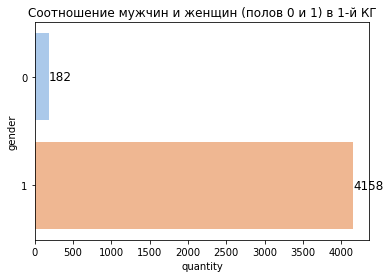

In [22]:
# Исследуем соотношение мужчин и женщин (полов "0" и "1") в 1-й контрольной группе
ax_1 = sns.countplot(y='gender', data=users_control_1, palette='pastel')

for p in ax_1.patches:
    ax_1.annotate(
        f'{int(p.get_width())}',
        (p.get_width(), p.get_y() + p.get_height() / 2),
        ha='left',
        va='center',
        color='black',
        fontsize=12
    )

plt.xlabel('quantity')
plt.ylabel('gender')
plt.title("Соотношение мужчин и женщин (полов 0 и 1) в 1-й КГ")
plt.show()

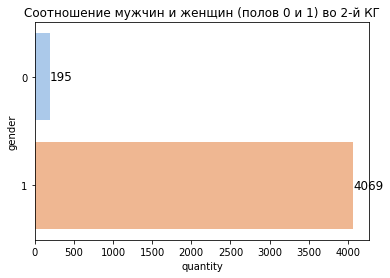

In [23]:
# Исследуем соотношение мужчин и женщин (полов "0" и "1") во 2-й контрольной группе
ax_2 = sns.countplot(y='gender', data=users_control_2, palette='pastel')

for p in ax_2.patches:
    ax_2.annotate(
        f'{int(p.get_width())}',
        (p.get_width(), p.get_y() + p.get_height() / 2),
        ha='left',
        va='center',
        color='black',
        fontsize=12
    )

plt.xlabel('quantity')
plt.ylabel('gender')
plt.title("Соотношение мужчин и женщин (полов 0 и 1) во 2-й КГ")
plt.show()

Видим, что соотношение полов в обеих контрольных группах (далее - КГ) далеко не одинаковое, а точнее испытуемых пола "1" примерно в 20 раз больше, чем испытуемых пола "0" (как в 1-й, так и во 2-й КГ).

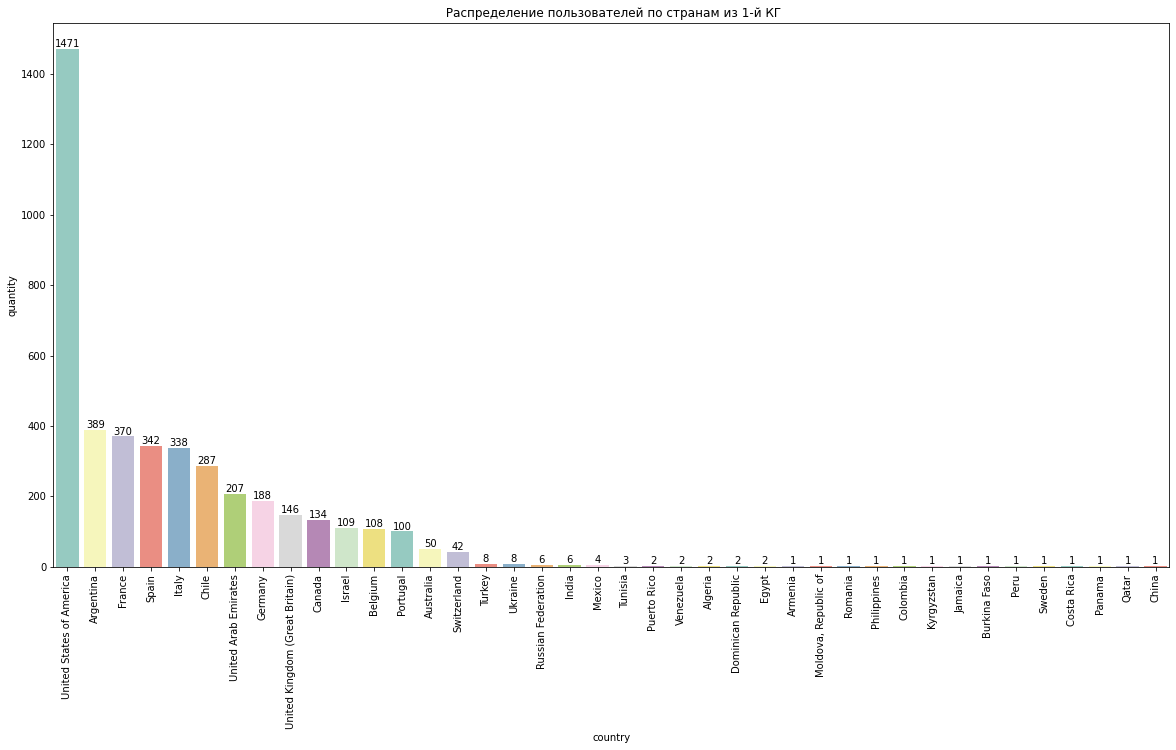

In [24]:
# Теперь посмотрим в каких странах живет сколько пользователей из 1-й КГ
country_counts_1 = users_control_1['country'].value_counts()
sorted_countries_1 = country_counts_1.index

plt.figure(figsize=(20, 10))
ax_3 = sns.countplot(x='country', data=users_control_1, palette='Set3', order=sorted_countries_1)
plt.xticks(rotation=90)
for p in ax_3.patches:
    ax_3.annotate(
        int(p.get_height()),
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center',
        va='bottom'
    )
plt.xlabel("country")
plt.ylabel("quantity")
plt.title(" Распределение пользователей по странам из 1-й КГ")
plt.show() 

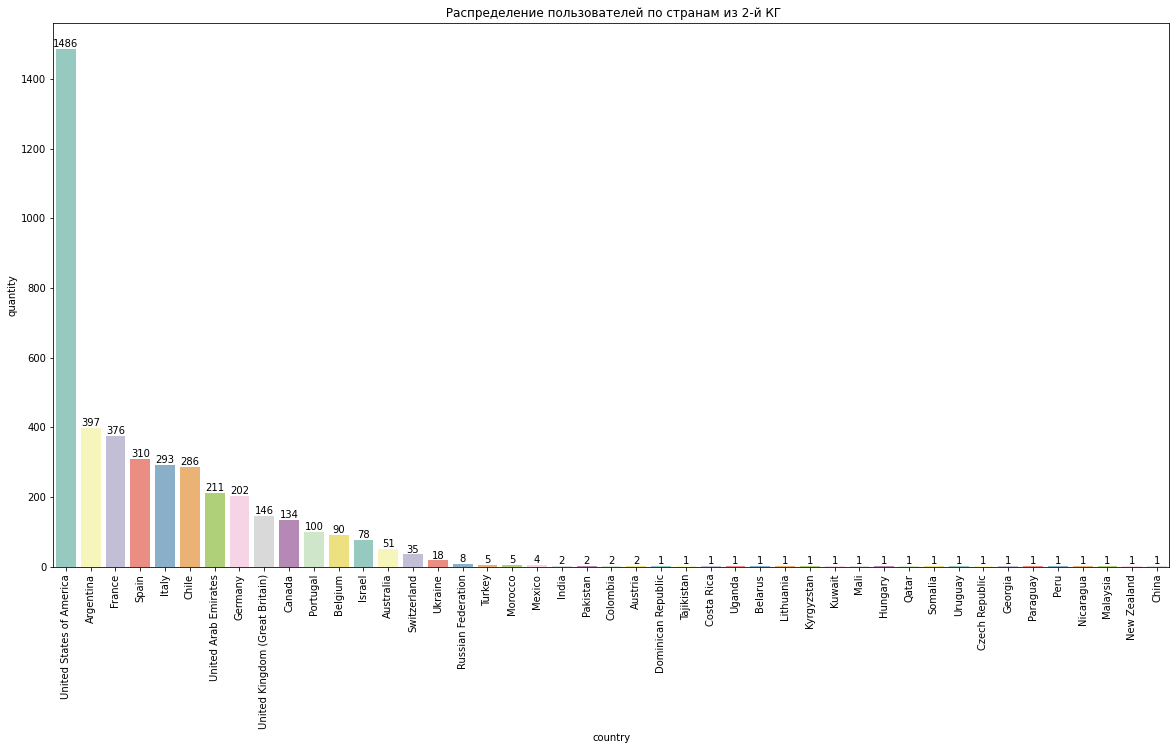

In [25]:
# Посмотрим на распределение по странам пользователей из 2-й КГ
country_counts_2 = users_control_2['country'].value_counts()
sorted_countries_2 = country_counts_2.index

plt.figure(figsize=(20, 10))
ax_4 = sns.countplot(x='country', data=users_control_2, palette='Set3', order=sorted_countries_2)
plt.xticks(rotation=90)
for p in ax_4.patches:
    ax_4.annotate(
        int(p.get_height()),
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center',
        va='bottom'
    )
plt.xlabel("country")
plt.ylabel("quantity")
plt.title(" Распределение пользователей по странам из 2-й КГ")
plt.show() 


Исходя из графиков можно увидеть, что:
1) В 1-ю КГ попали жители 40-ка стран, а во 2-ю КГ - 45-ти стран; 
2) Только в 15-ти странах для 1-й КГ и в 16-ти странах для 2-й КГ кол-во участников составило более десяти; 
3) Больше всего испытуемых проживают в США (1471 и 1486 человек для обеих групп соответственно).

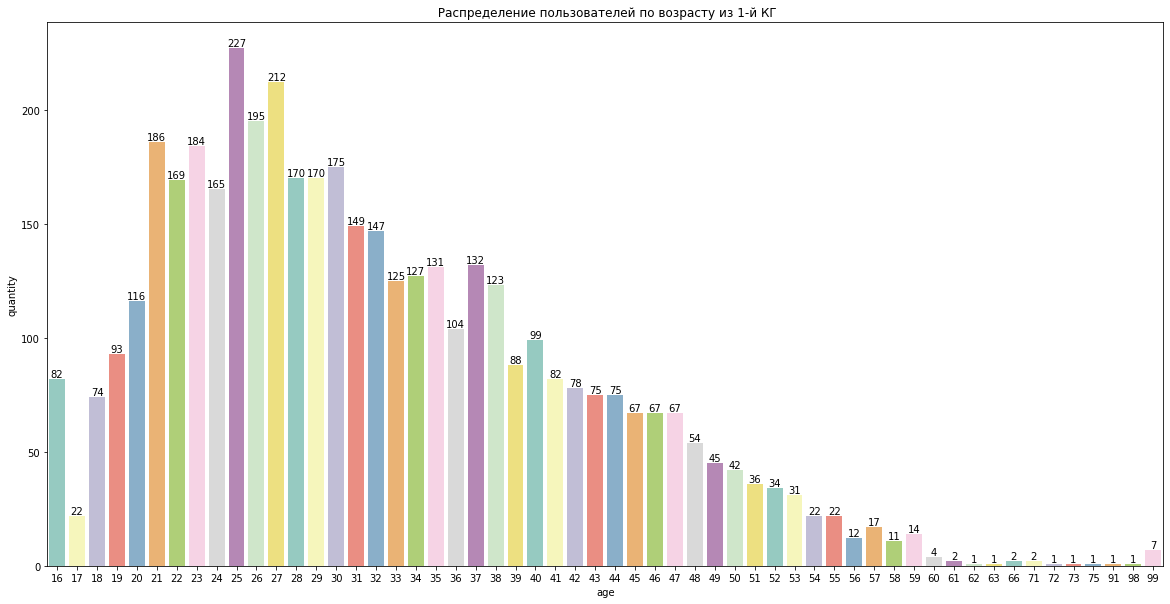

In [26]:
# Посмотрим, какого возраста пользователи приложения в 1-й КГ
plt.figure(figsize=(20, 10))
ax_5 = sns.countplot(x='age', data=users_control_1, palette='Set3')
for p in ax_5.patches:
    ax_5.annotate(
        int(p.get_height()),
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center',
        va='bottom'
    )
plt.xlabel("age")
plt.ylabel("quantity")
plt.title(" Распределение пользователей по возрасту из 1-й КГ")
plt.show() 

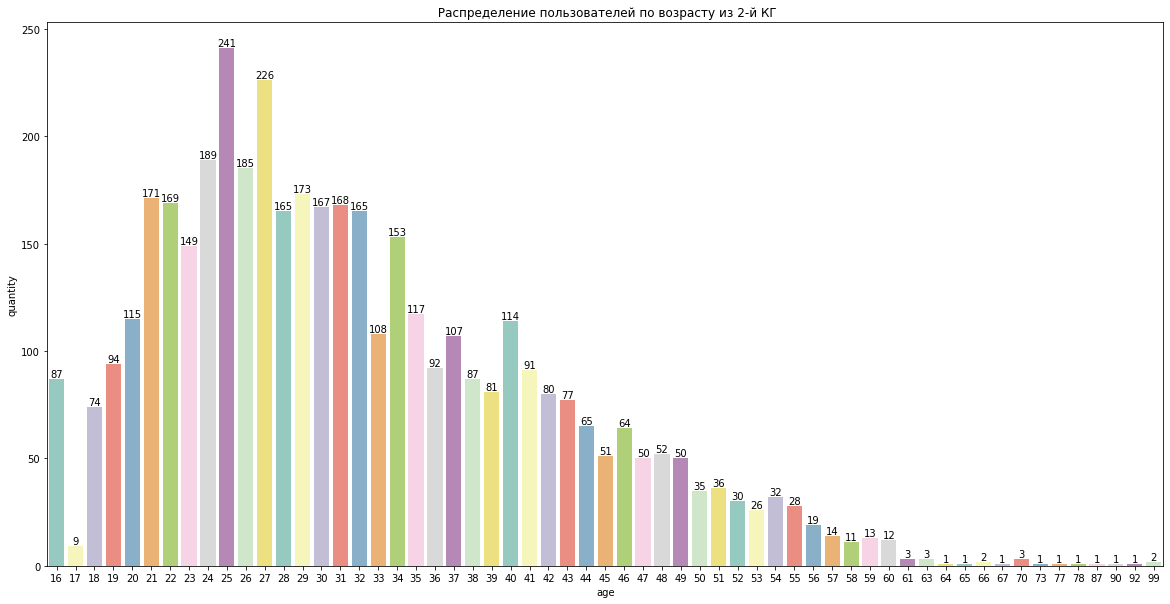

In [27]:
# Также посмотрим, какого возраста пользователи приложения во 2-й КГ
plt.figure(figsize=(20, 10))
ax_6 = sns.countplot(x='age', data=users_control_2, palette='Set3')
for p in ax_6.patches:
    ax_6.annotate(
        int(p.get_height()),
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center',
        va='bottom'
    )
plt.xlabel("age")
plt.ylabel("quantity")
plt.title(" Распределение пользователей по возрасту из 2-й КГ")
plt.show() 

Исходя из графиков можно увидеть, что: 1) Всего в обе КГ попали люди от 16 до 99 лет; 2) Кол-во участников составило более десяти для 1-й КГ в возрасте от 16 до 59 лет, а для 2-й КГ в возрасте 16 лет и от 18 до 60 лет;  3) Модальный возраст испытуемых в обеих группах - 25 лет (227 и 241 человек соответственно).

Теперь проведем все вышеперечисленные операции для тестовой группы.

In [28]:
users_test.head()

,uid,age,attraction_coeff,coins,country,visit_days,gender,age_filter_start,age_filter_end,views_count,was_premium,is_premium,total_revenue
0,892309896,27,685,NaN,United States of America,"1,2,3,4,5,6,7,8,9,10,11,12,16,17",1,24,30,89,NaN,NaN,0
1,892044516,27,0,NaN,Germany,NaN,1,24,30,0,NaN,NaN,0
2,892185708,45,44,NaN,Israel,"1,3,4,6,7,8,10,11,12,13,14,15,16,17,18,19,20,2...",1,42,48,68,NaN,NaN,0
3,892130292,32,0,NaN,United States of America,"1,2,3,4,5,6,7,8,9,10,11,12",1,29,35,0,NaN,NaN,0
4,891406035,27,1000,NaN,France,NaN,1,24,30,1,1.0,NaN,0


In [29]:
users_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4308 entries, 0 to 4307
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   uid               4308 non-null   int64  
 1   age               4308 non-null   int64  
 2   attraction_coeff  4308 non-null   int64  
 3   coins             49 non-null     float64
 4   country           4308 non-null   object 
 5   visit_days        2978 non-null   object 
 6   gender            4308 non-null   int64  
 7   age_filter_start  4308 non-null   int64  
 8   age_filter_end    4308 non-null   int64  
 9   views_count       4308 non-null   int64  
 10  was_premium       408 non-null    float64
 11  is_premium        157 non-null    float64
 12  total_revenue     4308 non-null   int64  
dtypes: float64(3), int64(8), object(2)
memory usage: 437.7+ KB


In [30]:
users_test.isnull().sum()

uid                    0
age                    0
attraction_coeff       0
coins               4259
country                0
visit_days          1330
gender                 0
age_filter_start       0
age_filter_end         0
views_count            0
was_premium         3900
is_premium          4151
total_revenue          0
dtype: int64

In [31]:
users_test['was_premium'] = users_test.was_premium.fillna(0)
users_test['is_premium'] = users_test.is_premium.fillna(0)

In [32]:
users_test.head()

,uid,age,attraction_coeff,coins,country,visit_days,gender,age_filter_start,age_filter_end,views_count,was_premium,is_premium,total_revenue
0,892309896,27,685,NaN,United States of America,"1,2,3,4,5,6,7,8,9,10,11,12,16,17",1,24,30,89,0.0,0.0,0
1,892044516,27,0,NaN,Germany,NaN,1,24,30,0,0.0,0.0,0
2,892185708,45,44,NaN,Israel,"1,3,4,6,7,8,10,11,12,13,14,15,16,17,18,19,20,2...",1,42,48,68,0.0,0.0,0
3,892130292,32,0,NaN,United States of America,"1,2,3,4,5,6,7,8,9,10,11,12",1,29,35,0,0.0,0.0,0
4,891406035,27,1000,NaN,France,NaN,1,24,30,1,1.0,0.0,0


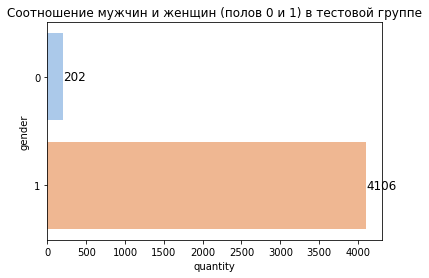

In [33]:
# Исследуем соотношение мужчин и женщин (полов "0" и "1") в тестовой группе
ax_7 = sns.countplot(y='gender', data=users_test, palette='pastel')

for p in ax_7.patches:
    ax_7.annotate(
        f'{int(p.get_width())}',
        (p.get_width(), p.get_y() + p.get_height() / 2),
        ha='left',
        va='center',
        color='black',
        fontsize=12
    )

plt.xlabel('quantity')
plt.ylabel('gender')
plt.title("Соотношение мужчин и женщин (полов 0 и 1) в тестовой группе")
plt.show()

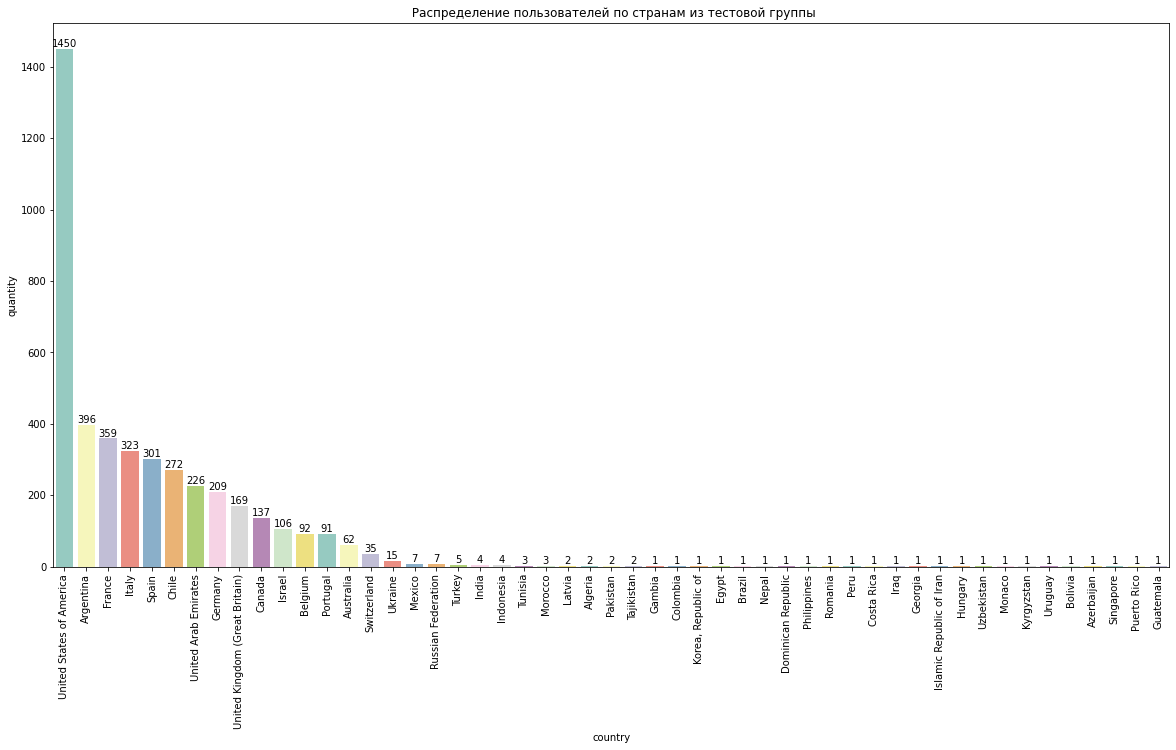

In [34]:
# Теперь посмотрим в каких странах живет сколько пользователей из нашей тестовой группы
country_counts_3 = users_test['country'].value_counts()
sorted_countries_3 = country_counts_3.index

plt.figure(figsize=(20, 10))
ax_8 = sns.countplot(x='country', data=users_test, palette='Set3', order=sorted_countries_3)
plt.xticks(rotation=90)
for p in ax_8.patches:
    ax_8.annotate(
        int(p.get_height()),
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center',
        va='bottom'
    )
plt.xlabel("country")
plt.ylabel("quantity")
plt.title(" Распределение пользователей по странам из тестовой группы")
plt.show() 

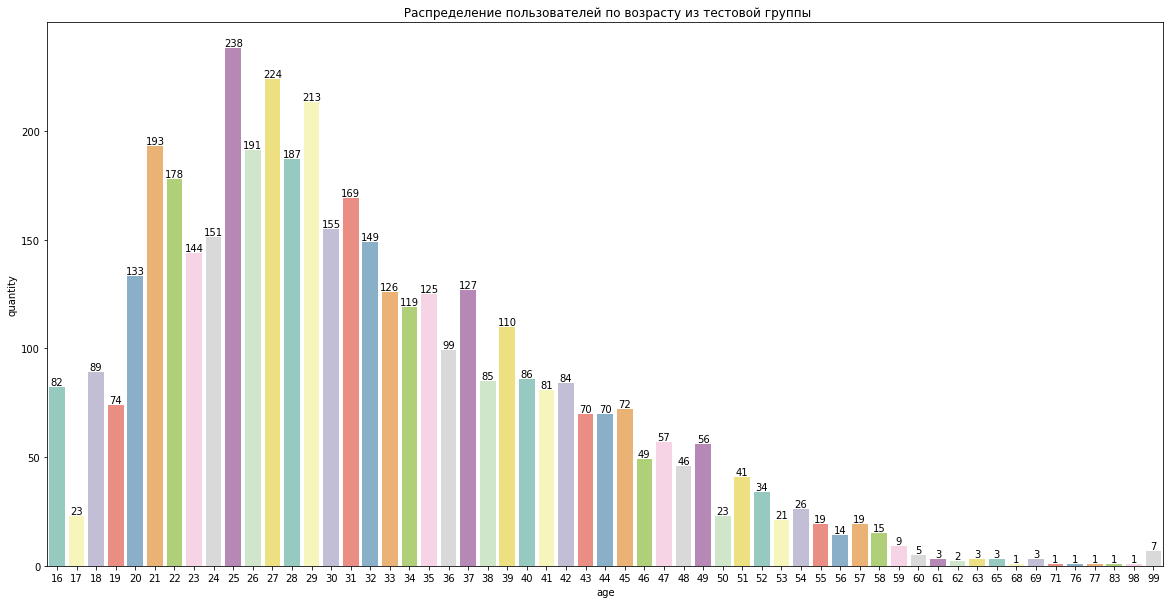

In [35]:
# Посмотрим, какого возраста пользователи приложения в тестовой группе 
plt.figure(figsize=(20, 10))
ax_9 = sns.countplot(x='age', data=users_test, palette='Set3')
for p in ax_9.patches:
    ax_9.annotate(
        int(p.get_height()),
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center',
        va='bottom'
    )
plt.xlabel("age")
plt.ylabel("quantity")
plt.title(" Распределение пользователей по возрасту из тестовой группы")
plt.show() 

Видим, что все данные тестовой группы аналогичны полученным данным из обеих контрольных групп.

Посмотрим, пользователи какого возраста в основном покупают нашу премиум-подписку во всех группах.

In [36]:
age_contr_1 = users_control_1.query('is_premium == "1.0"').age

In [37]:
age_contr_2 = users_control_2.query('is_premium == "1.0"').age

In [38]:
age_test = users_test.query('is_premium == "1.0"').age

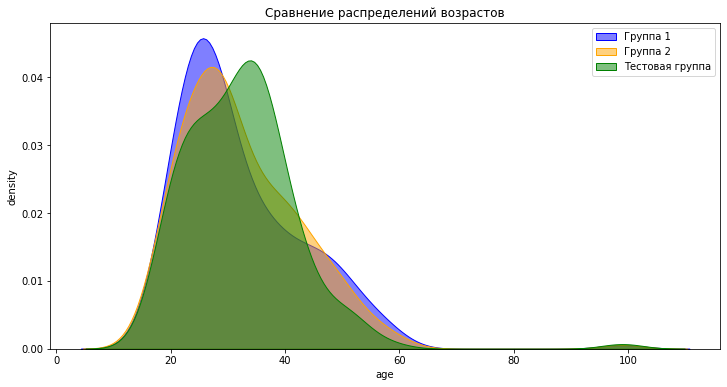

In [39]:
plt.figure(figsize=(12, 6))
sns.kdeplot(age_contr_1, color='blue', label='Группа 1', fill=True, alpha=0.5)
sns.kdeplot(age_contr_2, color='orange', label='Группа 2', fill=True, alpha=0.5)
sns.kdeplot(age_test, color='green', label='Тестовая группа', fill=True, alpha=0.5)

plt.xlabel("age")
plt.ylabel("density")
plt.title("Сравнение распределений возрастов")
plt.legend()
plt.show()

Видим, что в тестовой группе, где стоимость премиум-подписки стала выше, средний возраст премиум-пользователей увеличился. Это может быть связано с бОльшей платежеспособностью клиентов данной возрастной категории.

### Часть 2. Транзакции.

Теперь изучим информацию о платежах пользователей аналогичным образом.

In [40]:
transactions_control_1.head()

,uid,country,joined_at,paid_at,revenue,payment_id,from_page,product_type
0,891319275.0,France,2017-05-11 19:57:00,2017-12-11 21:57:00,12727.0,147.0,trial_vip_popup,trial_premium
1,892421826.0,Israel,2017-10-14 12:46:00,2017-10-23 12:54:00,14586.0,147.0,trial_vip_popup,trial_premium
2,891822480.0,Italy,2017-10-26 22:27:00,2017-12-11 20:59:00,1911.0,19.0,none,coins
3,891367521.0,Italy,2017-05-11 02:37:00,2017-06-11 19:15:00,1456.0,127.0,sympathy,other_type
4,892207959.0,France,2017-10-18 18:30:00,2017-12-11 12:03:00,1261.0,19.0,empty_likes,coins


In [41]:
transactions_control_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007 entries, 0 to 1006
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   uid           377 non-null    float64
 1   country       377 non-null    object 
 2   joined_at     1007 non-null   object 
 3   paid_at       1007 non-null   object 
 4   revenue       377 non-null    float64
 5   payment_id    377 non-null    float64
 6   from_page     377 non-null    object 
 7   product_type  377 non-null    object 
dtypes: float64(3), object(5)
memory usage: 63.1+ KB


In [42]:
# Переведем колонки с данными о времени регистрации и покупки в удобный формат
transactions_control_1['joined_at'] = pd.to_datetime(transactions_control_1['joined_at'])
transactions_control_1['paid_at'] = pd.to_datetime(transactions_control_1['paid_at'])

In [43]:
transactions_control_1

,uid,country,joined_at,paid_at,revenue,payment_id,from_page,product_type
0,891319275.0,France,2017-05-11 19:57:00,2017-12-11 21:57:00,12727.0,147.0,trial_vip_popup,trial_premium
1,892421826.0,Israel,2017-10-14 12:46:00,2017-10-23 12:54:00,14586.0,147.0,trial_vip_popup,trial_premium
2,891822480.0,Italy,2017-10-26 22:27:00,2017-12-11 20:59:00,1911.0,19.0,none,coins
3,891367521.0,Italy,2017-05-11 02:37:00,2017-06-11 19:15:00,1456.0,127.0,sympathy,other_type
4,892207959.0,France,2017-10-18 18:30:00,2017-12-11 12:03:00,1261.0,19.0,empty_likes,coins
...,...,...,...,...,...,...,...,...
1002,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN
1003,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN
1004,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN
1005,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN


In [44]:
transactions_control_1.isnull().sum()

uid             630
country         630
joined_at       630
paid_at         630
revenue         630
payment_id      630
from_page       630
product_type    630
dtype: int64

In [45]:
# В данном случае удаляем все NaN, поскольку они не несут никакой смысловой нагрузки
transactions_control_1 = transactions_control_1.dropna()

In [46]:
transactions_control_1.shape

(377, 8)

Аналогичные действия проведем для 2-й контрольной группы.

In [47]:
transactions_control_2.head()

,uid,country,joined_at,paid_at,revenue,payment_id,from_page,product_type
0,891266616,Argentina,2017-06-11 15:25:00,2017-10-11 17:35:00,6305,19,autorefill,coins
1,892186737,Chile,2017-10-19 06:03:00,2017-04-11 08:53:00,4732,147,promo_09,premium_no_trial
2,891959004,United States of America,2017-10-24 00:12:00,2017-10-31 02:12:00,10153,147,trial_vip_popup,trial_premium
3,892115478,Spain,2017-10-20 20:39:00,2017-10-26 06:26:00,2366,67,empty_likes,other_type
4,891592941,Switzerland,2017-10-31 12:40:00,2017-03-11 16:25:00,6292,147,promo_09,premium_no_trial


In [48]:
transactions_control_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 328 entries, 0 to 327
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   uid           328 non-null    int64 
 1   country       328 non-null    object
 2   joined_at     328 non-null    object
 3   paid_at       328 non-null    object
 4   revenue       328 non-null    int64 
 5   payment_id    328 non-null    int64 
 6   from_page     328 non-null    object
 7   product_type  328 non-null    object
dtypes: int64(3), object(5)
memory usage: 20.6+ KB


In [49]:
transactions_control_2['joined_at'] = pd.to_datetime(transactions_control_2['joined_at'])
transactions_control_2['paid_at'] = pd.to_datetime(transactions_control_2['paid_at'])

In [50]:
transactions_control_2.isnull().sum()

uid             0
country         0
joined_at       0
paid_at         0
revenue         0
payment_id      0
from_page       0
product_type    0
dtype: int64

In [51]:
transactions_control_2

,uid,country,joined_at,paid_at,revenue,payment_id,from_page,product_type
0,891266616,Argentina,2017-06-11 15:25:00,2017-10-11 17:35:00,6305,19,autorefill,coins
1,892186737,Chile,2017-10-19 06:03:00,2017-04-11 08:53:00,4732,147,promo_09,premium_no_trial
2,891959004,United States of America,2017-10-24 00:12:00,2017-10-31 02:12:00,10153,147,trial_vip_popup,trial_premium
3,892115478,Spain,2017-10-20 20:39:00,2017-10-26 06:26:00,2366,67,empty_likes,other_type
4,891592941,Switzerland,2017-10-31 12:40:00,2017-03-11 16:25:00,6292,147,promo_09,premium_no_trial
...,...,...,...,...,...,...,...,...
323,891985866,Belgium,2017-10-23 13:19:00,2017-10-30 15:35:00,16640,147,trial_vip_popup,trial_premium
324,891491145,United States of America,2017-02-11 18:13:00,2017-09-11 20:32:00,12727,147,send_message,trial_premium
325,892053750,United States of America,2017-10-22 00:46:00,2017-10-28 08:17:00,1261,19,autorefill,coins
326,891668253,Chile,2017-10-29 23:08:00,2017-11-15 00:57:00,9997,147,trial_vip_popup,trial_premium


In [52]:
# Посмотрим, за какой период собрана информация о платежах в 1-й КГ
transactions_control_1.joined_at.min()

Timestamp('2015-01-19 11:49:00')

In [53]:
transactions_control_1.joined_at.max()

Timestamp('2017-10-31 22:17:00')

In [54]:
transactions_control_1.paid_at.min()

Timestamp('2016-12-14 16:16:00')

In [55]:
transactions_control_1.paid_at.max()

Timestamp('2017-12-11 21:57:00')

In [56]:
# Сравним с теми же данными по 2-й КГ
transactions_control_2.joined_at.min()

Timestamp('2017-01-11 08:36:00')

In [57]:
transactions_control_2.joined_at.max()

Timestamp('2017-10-31 17:43:00')

In [58]:
transactions_control_2.paid_at.min()

Timestamp('2017-01-11 05:34:00')

In [59]:
transactions_control_2.paid_at.max()

Timestamp('2017-12-11 23:28:00')

Видим, что для 1-й КГ данные собирались с 2015 по 2017 год, в то время как для 2-й КГ все данные только за 2017 год.

In [60]:
# Посмотрим, сколько времени обычно проходит между регистрацией и оплатой для пользователей 1-й КГ
transactions_control_1['diff'] = transactions_control_1['paid_at'] - transactions_control_1['joined_at']
transactions_control_1.sort_values(by='diff')

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,uid,country,joined_at,paid_at,revenue,payment_id,from_page,product_type,diff
66,891822480.0,Italy,2017-10-26 22:27:00,2017-01-11 16:50:00,1898.0,19.0,none,coins,-289 days +18:23:00
254,891908385.0,Argentina,2017-10-25 02:33:00,2017-01-11 04:34:00,10686.0,147.0,trial_vip_popup,trial_premium,-287 days +02:01:00
87,891881343.0,United States of America,2017-10-25 17:58:00,2017-01-11 21:08:00,12727.0,147.0,dating,trial_premium,-287 days +03:10:00
124,892136748.0,France,2017-10-20 10:32:00,2017-01-11 04:10:00,2834.0,19.0,none,coins,-283 days +17:38:00
374,892145004.0,Chile,2017-10-20 04:25:00,2017-01-11 02:56:00,9919.0,147.0,trial_vip_popup,trial_premium,-283 days +22:31:00
...,...,...,...,...,...,...,...,...,...
216,891452706.0,Italy,2017-03-11 14:48:00,2017-11-11 17:21:00,6305.0,19.0,gifts,coins,245 days 02:33:00
250,891529926.0,United States of America,2017-01-11 19:54:00,2017-11-14 12:52:00,9087.0,147.0,trial_vip_popup,trial_premium,306 days 16:58:00
224,960936960.0,Russian Federation,2015-01-19 11:49:00,2016-12-14 16:16:00,143.0,0.0,refund_WP,other_type,695 days 04:27:00
65,960936960.0,Russian Federation,2015-01-19 11:49:00,2016-12-14 17:30:00,26.0,0.0,refund_VP,other_type,695 days 05:41:00


In [61]:
# Проверим, что происходит во 2-й КГ
transactions_control_2['diff'] = transactions_control_2['paid_at'] - transactions_control_2['joined_at']
transactions_control_2.sort_values(by='diff')

,uid,country,joined_at,paid_at,revenue,payment_id,from_page,product_type,diff
20,891609360,Italy,2017-10-31 02:07:00,2017-01-11 23:19:00,3913,146,empty_likes,coins,-293 days +21:12:00
174,891664350,Germany,2017-10-30 00:21:00,2017-01-11 22:36:00,6279,147,left_sidebar_menu,premium_no_trial,-292 days +22:15:00
49,891664350,Germany,2017-10-30 00:21:00,2017-01-11 22:36:00,2327,67,empty_mutual,other_type,-292 days +22:15:00
129,891937068,Portugal,2017-10-24 14:22:00,2017-01-11 05:34:00,2015,19,none,coins,-287 days +15:12:00
292,891637005,Spain,2017-10-30 15:22:00,2017-02-11 13:38:00,6292,147,left_sidebar_menu,premium_no_trial,-262 days +22:16:00
...,...,...,...,...,...,...,...,...,...
237,891494307,Turkey,2017-02-11 16:45:00,2017-09-11 19:30:00,7033,147,trial_vip_popup,trial_premium,212 days 02:45:00
219,891452592,France,2017-03-11 14:51:00,2017-10-11 16:51:00,12701,147,trial_vip_popup,trial_premium,214 days 02:00:00
152,891436977,Spain,2017-03-11 20:48:00,2017-10-11 22:48:00,16666,147,trial_vip_popup,trial_premium,214 days 02:00:00
113,891312516,United States of America,2017-05-11 21:27:00,2017-12-11 23:28:00,12727,147,trial_vip_popup,trial_premium,214 days 02:01:00


Видим, что в 1-й КГ есть юзер 960936960.0, который совершил покупку только почти спустя 2 года после регистрации. Также видим, что у нас есть пользователи, которые сначала совершили покупку и только где-то через 9 месяцев зарегистрировались в нашем дейтинговом приложении (хотя обычно все происходит в обратном порядке). Возможно, случился какой-то системный баг и данные неверно записались в хранилище, но поскольку сам факт оплаты зафиксирован верно, то мы не будем отсеивать эти данные. Некорректная информация по времени между регистрацией и оплатой не повлияет на наши дальнейшие расчеты (тем более, что данных по транзакциям у нас в целом немного для анализа, поэтому при их отсеивании мы скорее потеряем точность последующих расчетов).

In [62]:
# Изучим, в какие дни совершалась регистрация пользователей 1-й КГ
transactions_control_1['joined_at_day'] = transactions_control_1['joined_at'].dt.to_period('D')
transactions_control_1.head()

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,uid,country,joined_at,paid_at,revenue,payment_id,from_page,product_type,diff,joined_at_day
0,891319275.0,France,2017-05-11 19:57:00,2017-12-11 21:57:00,12727.0,147.0,trial_vip_popup,trial_premium,214 days 02:00:00,2017-05-11
1,892421826.0,Israel,2017-10-14 12:46:00,2017-10-23 12:54:00,14586.0,147.0,trial_vip_popup,trial_premium,9 days 00:08:00,2017-10-14
2,891822480.0,Italy,2017-10-26 22:27:00,2017-12-11 20:59:00,1911.0,19.0,none,coins,45 days 22:32:00,2017-10-26
3,891367521.0,Italy,2017-05-11 02:37:00,2017-06-11 19:15:00,1456.0,127.0,sympathy,other_type,31 days 16:38:00,2017-05-11
4,892207959.0,France,2017-10-18 18:30:00,2017-12-11 12:03:00,1261.0,19.0,empty_likes,coins,53 days 17:33:00,2017-10-18


In [63]:
transactions_control_1.groupby('joined_at_day').agg({'uid':'nunique'})

,uid
joined_at_day,
2015-01-19,1
2017-01-11,7
2017-02-11,6
2017-03-11,6
2017-04-11,6
2017-05-11,15
2017-06-11,18
2017-07-11,5
2017-08-11,4


In [64]:
# Проверим, что происходит во 2-й КГ
transactions_control_2['joined_at_day'] = transactions_control_2['joined_at'].dt.to_period('D')
transactions_control_2.head()

,uid,country,joined_at,paid_at,revenue,payment_id,from_page,product_type,diff,joined_at_day
0,891266616,Argentina,2017-06-11 15:25:00,2017-10-11 17:35:00,6305,19,autorefill,coins,122 days 02:10:00,2017-06-11
1,892186737,Chile,2017-10-19 06:03:00,2017-04-11 08:53:00,4732,147,promo_09,premium_no_trial,-191 days +02:50:00,2017-10-19
2,891959004,United States of America,2017-10-24 00:12:00,2017-10-31 02:12:00,10153,147,trial_vip_popup,trial_premium,7 days 02:00:00,2017-10-24
3,892115478,Spain,2017-10-20 20:39:00,2017-10-26 06:26:00,2366,67,empty_likes,other_type,5 days 09:47:00,2017-10-20
4,891592941,Switzerland,2017-10-31 12:40:00,2017-03-11 16:25:00,6292,147,promo_09,premium_no_trial,-234 days +03:45:00,2017-10-31


In [65]:
transactions_control_2.groupby('joined_at_day').agg({'uid':'nunique'})

,uid
joined_at_day,
2017-01-11,3
2017-02-11,5
2017-03-11,5
2017-04-11,3
2017-05-11,13
2017-06-11,9
2017-07-11,5
2017-08-11,4
2017-09-11,3


Из полученных данных можем сделать следующие выводы:
1) во-первых, в 1-й КГ за 2015-й год зарегистрировался всего 1 пользователь, что, возможно, было пробной регистрацией, когда приложение еще не начало полноценно работать, поэтому мы все же можем сказать, что в 1-й КГ данные так же были собраны за 2017-й год; 
2) с января по сентябрь пользователи регистрировались в приложении только 11-го числа (может быть из-за бага приложения, проводимой акции, проблем с обновлением данных), а в октябре даты регистрации уже более разнообразны.

In [66]:
# Аналогичная картина и с платежами (для примера приведем данные только по 1-й КГ)
transactions_control_1['paid_at_day'] = transactions_control_1['paid_at'].dt.to_period('D')
transactions_control_1.head()

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,uid,country,joined_at,paid_at,revenue,payment_id,from_page,product_type,diff,joined_at_day,paid_at_day
0,891319275.0,France,2017-05-11 19:57:00,2017-12-11 21:57:00,12727.0,147.0,trial_vip_popup,trial_premium,214 days 02:00:00,2017-05-11,2017-12-11
1,892421826.0,Israel,2017-10-14 12:46:00,2017-10-23 12:54:00,14586.0,147.0,trial_vip_popup,trial_premium,9 days 00:08:00,2017-10-14,2017-10-23
2,891822480.0,Italy,2017-10-26 22:27:00,2017-12-11 20:59:00,1911.0,19.0,none,coins,45 days 22:32:00,2017-10-26,2017-12-11
3,891367521.0,Italy,2017-05-11 02:37:00,2017-06-11 19:15:00,1456.0,127.0,sympathy,other_type,31 days 16:38:00,2017-05-11,2017-06-11
4,892207959.0,France,2017-10-18 18:30:00,2017-12-11 12:03:00,1261.0,19.0,empty_likes,coins,53 days 17:33:00,2017-10-18,2017-12-11


In [67]:
transactions_control_1.groupby('paid_at_day').agg({'uid':'nunique'})

,uid
paid_at_day,
2016-12-14,1
2017-01-11,9
2017-02-11,7
2017-03-11,4
2017-04-11,14
2017-05-11,16
2017-06-11,16
2017-07-11,11
2017-08-11,10


In [68]:
transactions_control_1 = transactions_control_1.drop('paid_at_day', axis=1)

Опять же, несмотря на всю свою "странность", такие данные по дате регистрации и оплаты не повлияют на наши дальнейшие расчеты, поэтому мы не будем их убирать. Единственное, нужно будет учесть в дальнейшем этот момент и перед следующим тестированием нашего дейтингового приложения исправить этот баг.

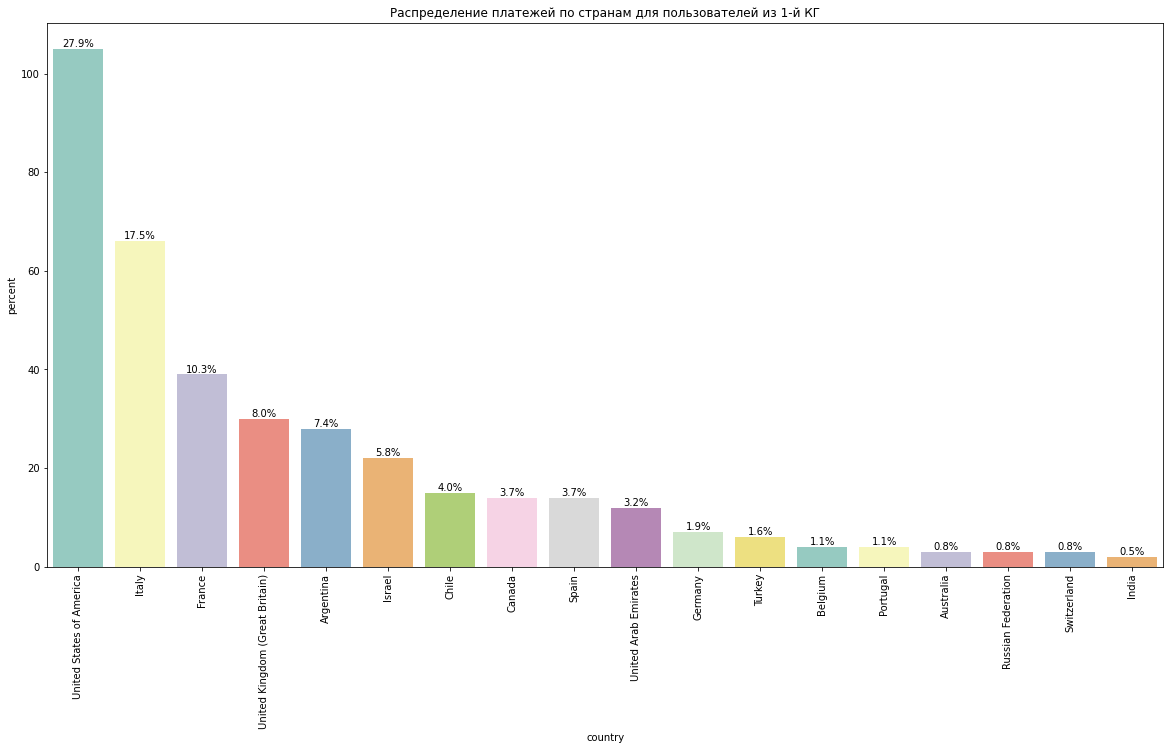

In [69]:
# Посмотрим на распределение платежей по странам для пользователей из 1-й КГ
# Поскольку кол-во человек в датасетах по платежам сильно ниже, то переведем наши данные в проценты
country_counts_4 = transactions_control_1['country'].value_counts()
sorted_countries_4 = country_counts_4.index
total_count_4 = country_counts_4.sum()

plt.figure(figsize=(20, 10))
ax_10 = sns.countplot(x='country', data=transactions_control_1, palette='Set3', order=sorted_countries_4)
plt.xticks(rotation=90)

for p in ax_10.patches:
    height = p.get_height()
    percentage = (height / total_count_4) * 100
    ax_10.annotate(
        f"{percentage:.1f}%",
        (p.get_x() + p.get_width() / 2., height),
        ha='center',
        va='bottom'
    )
plt.xlabel("country")
plt.ylabel("percent")
plt.title("Распределение платежей по странам для пользователей из 1-й КГ")
plt.show() 

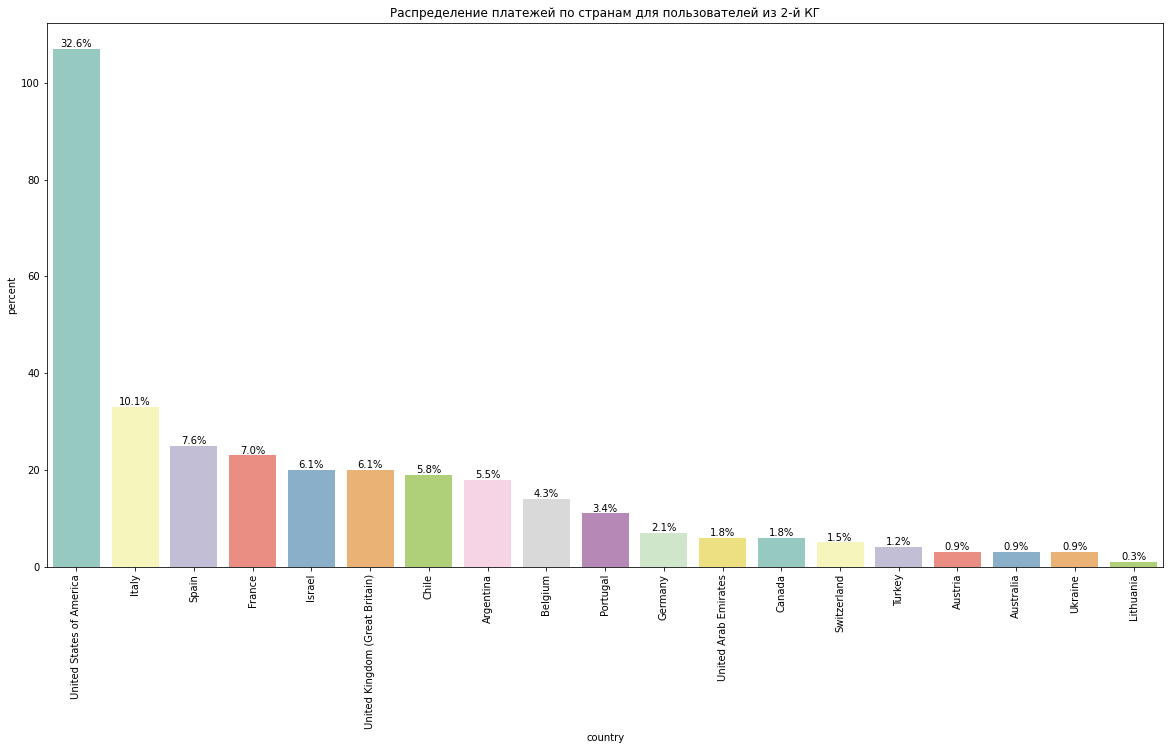

In [70]:
# Теперь посмотрим на распределение платежей по странам для пользователей из 2-й КГ
country_counts_5 = transactions_control_2['country'].value_counts()
sorted_countries_5 = country_counts_5.index
total_count_5 = country_counts_5.sum()

plt.figure(figsize=(20, 10))
ax_11 = sns.countplot(x='country', data=transactions_control_2, palette='Set3', order=sorted_countries_5)
plt.xticks(rotation=90)

for p in ax_11.patches:
    height = p.get_height()
    percentage = (height / total_count_5) * 100
    ax_11.annotate(
        f"{percentage:.1f}%",
        (p.get_x() + p.get_width() / 2., height),
        ha='center',
        va='bottom'
    )
plt.xlabel("country")
plt.ylabel("percent")
plt.title("Распределение платежей по странам для пользователей из 2-й КГ")
plt.show() 

Видим, что в 1-й КГ у нас 18 стран, а во 2-й - 19 стран. Распределение пользователей по странам в обеих группах в целом схожее, максимальное кол-во человек отмечено в США (27,9% и 32,6% соответственно). Общее кол-во стран в датасетах с платежами сравнимо ниже, чем в датасетах с информацией о всех пользователях, значит, круг лиц, плативших за приложение сравнимо меньше общего числа юзеров.

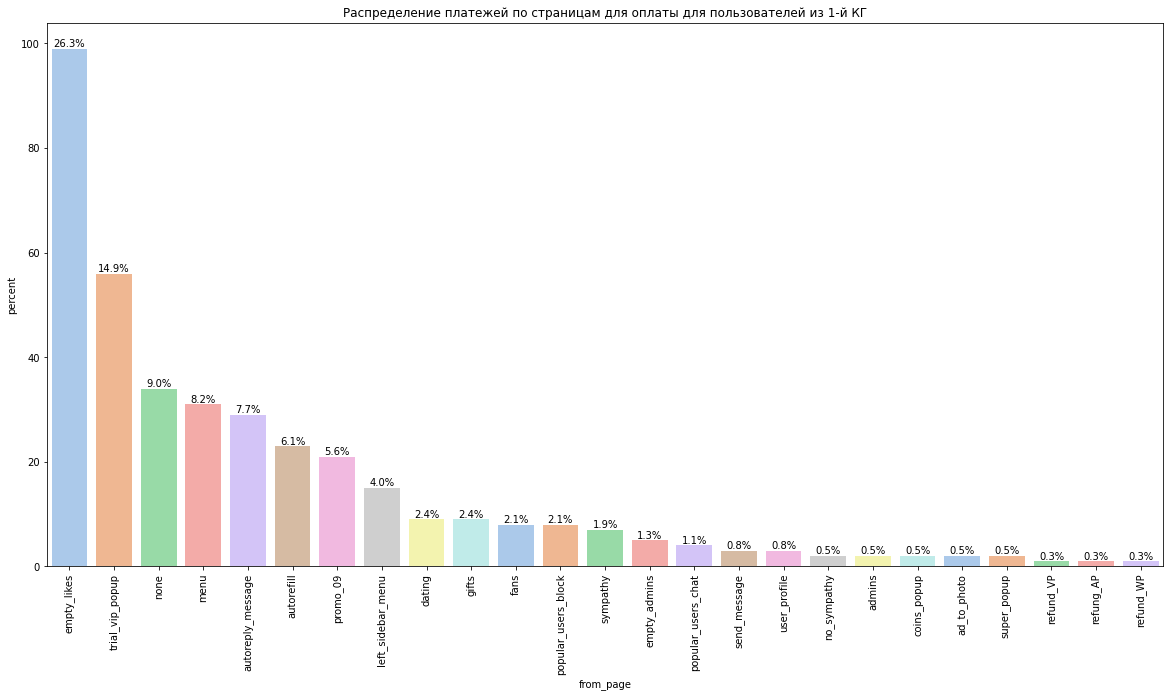

In [71]:
# Проанализируем, с каких страниц заходит большая часть пользователей на страницу оплаты из обеих КГ
page_counts_6 = transactions_control_1['from_page'].value_counts()
sorted_pages_6 = page_counts_6.index
total_count_6 = page_counts_6.sum()

plt.figure(figsize=(20, 10))
ax_12 = sns.countplot(x='from_page', data=transactions_control_1, palette='pastel', order=sorted_pages_6)
plt.xticks(rotation=90)

for p in ax_12.patches:
    height = p.get_height()
    percentage = (height / total_count_6) * 100
    ax_12.annotate(
        f"{percentage:.1f}%",
        (p.get_x() + p.get_width() / 2., height),
        ha='center',
        va='bottom'
    )
plt.xlabel("from_page")
plt.ylabel("percent")
plt.title("Распределение платежей по страницам для оплаты для пользователей из 1-й КГ")
plt.show() 

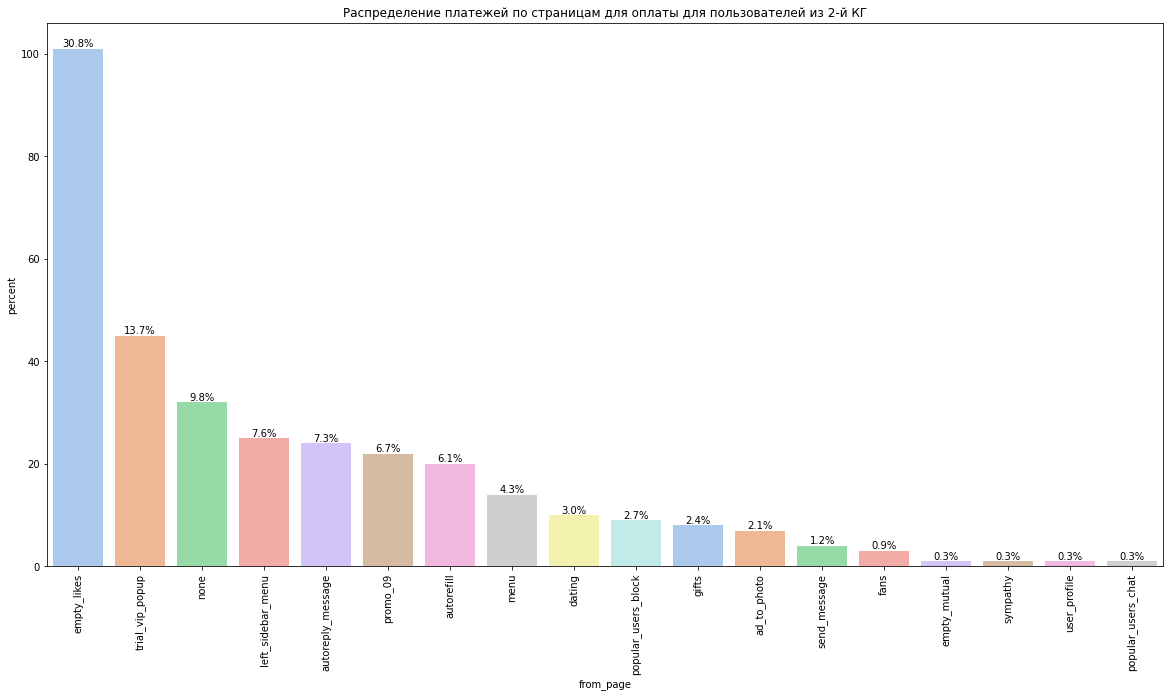

In [72]:
page_counts_7 = transactions_control_2['from_page'].value_counts()
sorted_pages_7 = page_counts_7.index
total_count_7 = page_counts_7.sum()

plt.figure(figsize=(20, 10))
ax_13 = sns.countplot(x='from_page', data=transactions_control_2, palette='pastel', order=sorted_pages_7)
plt.xticks(rotation=90)

for p in ax_13.patches:
    height = p.get_height()
    percentage = (height / total_count_7) * 100
    ax_13.annotate(
        f"{percentage:.1f}%",
        (p.get_x() + p.get_width() / 2., height),
        ha='center',
        va='bottom'
    )
plt.xlabel("from_page")
plt.ylabel("percent")
plt.title("Распределение платежей по страницам для оплаты для пользователей из 2-й КГ")
plt.show() 

В 1-й КГ у нас всего 25 страниц, а во 2-й КГ - 18. Чаще всего пользователи переходят на страницу оплаты со страниц empty_likes и trial_vip_popup.

В условии задачи также упоминались платежные системы - мы можем косвенно проанализировать инфорцию о них по идентификатору платежа.

In [73]:
# Проанализируем информацию о платежных системах
transactions_control_1.query('product_type == "premium_no_trial"').groupby('payment_id').agg({'uid':'count'})

,uid
payment_id,
0.0,2
68.0,16
147.0,88


In [74]:
transactions_control_2.query('product_type == "premium_no_trial"').groupby('payment_id').agg({'uid':'count'})

,uid
payment_id,
0,1
68,14
147,92


Видим, что всего у нас 3 платежные системы для категории premium_no_trial, а данные об использовании платежных систем в обеих контрольных группах идентичны.

In [75]:
# Посмотрим, у какого типа продукта больше средний чек для обеих КГ
revenue_by_product_type_1 = (
    transactions_control_1
    .groupby('product_type', as_index=False)
    .agg({'revenue': 'mean'})
)
revenue_by_product_type_1

,product_type,revenue
0,coins,5851.744966
1,other_type,3425.854545
2,premium_no_trial,7351.500000
3,trial_premium,11533.134328


In [76]:
revenue_by_product_type_2 = (
    transactions_control_2
    .groupby('product_type', as_index=False)
    .agg({'revenue': 'mean'})
)
revenue_by_product_type_2

,product_type,revenue
0,coins,3249.266129
1,other_type,2925.886364
2,premium_no_trial,6960.831776
3,trial_premium,12150.584906


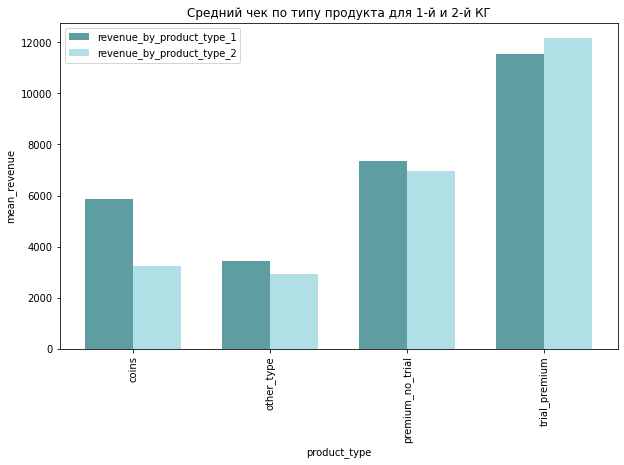

In [77]:
product_types = revenue_by_product_type_1['product_type']
revenue1 = revenue_by_product_type_1['revenue']
revenue2 = revenue_by_product_type_2['revenue']

x = np.arange(len(product_types))
width = 0.35

plt.figure(figsize=(10, 6))
plt.bar(x - width / 2, revenue1, width, label='revenue_by_product_type_1', color='cadetblue')
plt.bar(x + width / 2, revenue2, width, label='revenue_by_product_type_2', color='powderblue')

plt.xlabel('product_type')
plt.ylabel('mean_revenue')
plt.title("Средний чек по типу продукта для 1-й и 2-й КГ")
plt.xticks(x, product_types, rotation=90)
plt.legend()

plt.show()

Можем сделать вывод о том, что средний чек выше всего для категории продукта trial_premium, а ниже всего для oter_type и coins. По категории coins видим разницу между обеими КГ в размере около 2500.

Теперь проведем все вышеперечисленные операции для тестовой группы.

In [78]:
transactions_test.head()

,uid,country,joined_at,paid_at,revenue,payment_id,from_page,product_type
0,891345942,Italy,2017-05-11 13:00:00,2017-11-13 15:04:00,12909,147,trial_vip_popup,trial_premium
1,892054251,United States of America,2017-10-22 00:33:00,2017-10-30 01:37:00,13923,147,trial_vip_popup,trial_premium
2,892236423,United States of America,2017-10-18 01:09:00,2017-10-23 00:15:00,3783,67,menu,other_type
3,892236423,United States of America,2017-10-18 01:09:00,2017-10-27 22:38:00,3783,67,menu,other_type
4,892168170,United States of America,2017-10-19 17:10:00,2017-10-27 19:10:00,9087,147,trial_vip_popup,trial_premium


In [79]:
transactions_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273 entries, 0 to 272
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   uid           273 non-null    int64 
 1   country       273 non-null    object
 2   joined_at     273 non-null    object
 3   paid_at       273 non-null    object
 4   revenue       273 non-null    int64 
 5   payment_id    273 non-null    int64 
 6   from_page     273 non-null    object
 7   product_type  273 non-null    object
dtypes: int64(3), object(5)
memory usage: 17.2+ KB


In [80]:
transactions_test['joined_at'] = pd.to_datetime(transactions_test['joined_at'])
transactions_test['paid_at'] = pd.to_datetime(transactions_test['paid_at'])

In [81]:
transactions_test.isnull().sum()

uid             0
country         0
joined_at       0
paid_at         0
revenue         0
payment_id      0
from_page       0
product_type    0
dtype: int64

In [82]:
transactions_test

,uid,country,joined_at,paid_at,revenue,payment_id,from_page,product_type
0,891345942,Italy,2017-05-11 13:00:00,2017-11-13 15:04:00,12909,147,trial_vip_popup,trial_premium
1,892054251,United States of America,2017-10-22 00:33:00,2017-10-30 01:37:00,13923,147,trial_vip_popup,trial_premium
2,892236423,United States of America,2017-10-18 01:09:00,2017-10-23 00:15:00,3783,67,menu,other_type
3,892236423,United States of America,2017-10-18 01:09:00,2017-10-27 22:38:00,3783,67,menu,other_type
4,892168170,United States of America,2017-10-19 17:10:00,2017-10-27 19:10:00,9087,147,trial_vip_popup,trial_premium
...,...,...,...,...,...,...,...,...
268,891419625,Israel,2017-04-11 05:58:00,2017-11-11 08:33:00,14352,147,trial_vip_popup,trial_premium
269,891447105,United Kingdom (Great Britain),2017-03-11 17:05:00,2017-11-11 04:23:00,7319,147,fans,premium_no_trial
270,891497073,United States of America,2017-02-11 15:33:00,2017-05-11 04:06:00,2730,67,empty_likes,other_type
271,891406224,Israel,2017-04-11 12:56:00,2017-04-11 13:35:00,2743,67,empty_likes,other_type


In [83]:
transactions_test.joined_at.min()

Timestamp('2017-01-11 03:07:00')

In [84]:
transactions_test.joined_at.max()

Timestamp('2017-10-31 23:40:00')

In [85]:
transactions_test.paid_at.min()

Timestamp('2017-01-11 04:37:00')

In [86]:
transactions_test.paid_at.max()

Timestamp('2017-12-11 22:06:00')

In [87]:
transactions_test['diff'] = transactions_test['paid_at'] - transactions_test['joined_at']
transactions_test.sort_values(by='diff')

,uid,country,joined_at,paid_at,revenue,payment_id,from_page,product_type,diff
184,891861594,Chile,2017-10-26 02:25:00,2017-01-11 04:37:00,4004,19,empty_likes,coins,-288 days +02:12:00
245,891861048,Canada,2017-10-26 02:55:00,2017-01-11 07:13:00,3523,19,none,coins,-288 days +04:18:00
183,891872313,Switzerland,2017-10-25 21:35:00,2017-01-11 23:36:00,9451,147,trial_vip_popup,trial_premium,-287 days +02:01:00
260,892018248,United Kingdom (Great Britain),2017-10-22 19:50:00,2017-01-11 13:42:00,6032,19,likes,coins,-285 days +17:52:00
200,891589239,Italy,2017-10-31 14:16:00,2017-02-11 11:45:00,6305,19,autorefill,coins,-263 days +21:29:00
...,...,...,...,...,...,...,...,...,...
6,891558921,United States of America,2017-01-11 03:07:00,2017-10-11 09:05:00,9100,147,left_sidebar_menu,premium_no_trial,273 days 05:58:00
251,891499695,United States of America,2017-02-11 14:14:00,2017-11-11 20:13:00,9698,147,dating,premium_no_trial,273 days 05:59:00
43,891558921,United States of America,2017-01-11 03:07:00,2017-10-11 09:08:00,897,146,menu,coins,273 days 06:01:00
230,891508155,Latvia,2017-02-11 09:46:00,2017-11-11 20:38:00,6357,147,promo_09,premium_no_trial,273 days 10:52:00


In [88]:
transactions_test['joined_at_day'] = transactions_test['joined_at'].dt.to_period('D')
transactions_test

,uid,country,joined_at,paid_at,revenue,payment_id,from_page,product_type,diff,joined_at_day
0,891345942,Italy,2017-05-11 13:00:00,2017-11-13 15:04:00,12909,147,trial_vip_popup,trial_premium,186 days 02:04:00,2017-05-11
1,892054251,United States of America,2017-10-22 00:33:00,2017-10-30 01:37:00,13923,147,trial_vip_popup,trial_premium,8 days 01:04:00,2017-10-22
2,892236423,United States of America,2017-10-18 01:09:00,2017-10-23 00:15:00,3783,67,menu,other_type,4 days 23:06:00,2017-10-18
3,892236423,United States of America,2017-10-18 01:09:00,2017-10-27 22:38:00,3783,67,menu,other_type,9 days 21:29:00,2017-10-18
4,892168170,United States of America,2017-10-19 17:10:00,2017-10-27 19:10:00,9087,147,trial_vip_popup,trial_premium,8 days 02:00:00,2017-10-19
...,...,...,...,...,...,...,...,...,...,...
268,891419625,Israel,2017-04-11 05:58:00,2017-11-11 08:33:00,14352,147,trial_vip_popup,trial_premium,214 days 02:35:00,2017-04-11
269,891447105,United Kingdom (Great Britain),2017-03-11 17:05:00,2017-11-11 04:23:00,7319,147,fans,premium_no_trial,244 days 11:18:00,2017-03-11
270,891497073,United States of America,2017-02-11 15:33:00,2017-05-11 04:06:00,2730,67,empty_likes,other_type,88 days 12:33:00,2017-02-11
271,891406224,Israel,2017-04-11 12:56:00,2017-04-11 13:35:00,2743,67,empty_likes,other_type,0 days 00:39:00,2017-04-11


In [89]:
transactions_test.groupby('joined_at_day').agg({'uid':'nunique'})

,uid
joined_at_day,
2017-01-11,4
2017-02-11,5
2017-03-11,2
2017-04-11,6
2017-05-11,12
2017-06-11,7
2017-07-11,6
2017-08-11,4
2017-10-11,1


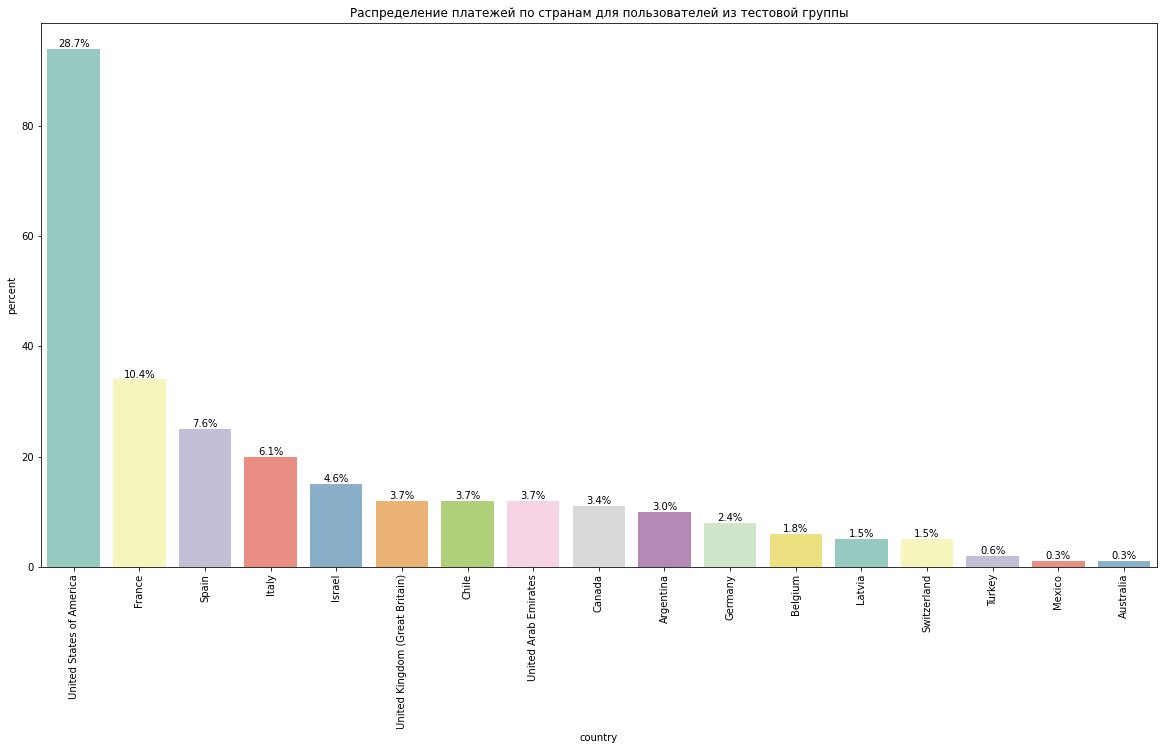

In [90]:
country_counts_8 = transactions_test['country'].value_counts()
sorted_countries_8 = country_counts_8.index
total_count_8 = country_counts_5.sum()

plt.figure(figsize=(20, 10))
ax_14 = sns.countplot(x='country', data=transactions_test, palette='Set3', order=sorted_countries_8)
plt.xticks(rotation=90)

for p in ax_14.patches:
    height = p.get_height()
    percentage = (height / total_count_8) * 100
    ax_14.annotate(
        f"{percentage:.1f}%",
        (p.get_x() + p.get_width() / 2., height),
        ha='center',
        va='bottom'
    )
plt.xlabel("country")
plt.ylabel("percent")
plt.title("Распределение платежей по странам для пользователей из тестовой группы")
plt.show() 

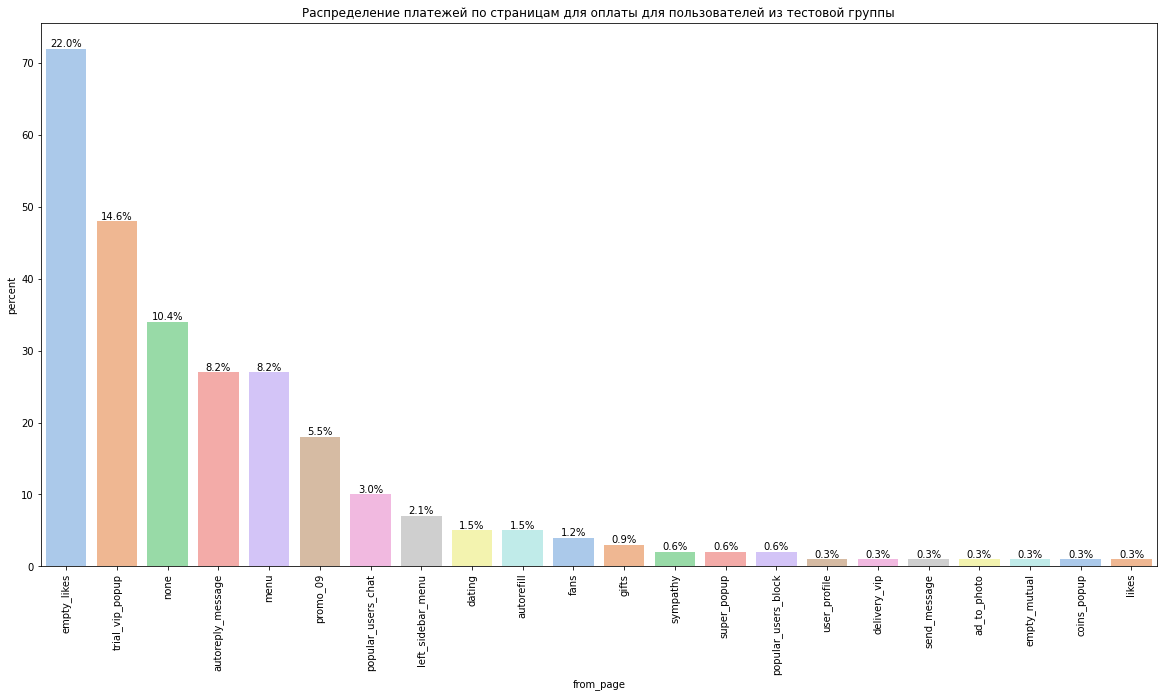

In [91]:
page_counts_9 = transactions_test['from_page'].value_counts()
sorted_pages_9 = page_counts_9.index
total_count_9 = page_counts_9.sum()

plt.figure(figsize=(20, 10))
ax_15 = sns.countplot(x='from_page', data=transactions_test, palette='pastel', order=sorted_pages_9)
plt.xticks(rotation=90)

for p in ax_15.patches:
    height = p.get_height()
    percentage = (height / total_count_7) * 100
    ax_15.annotate(
        f"{percentage:.1f}%",
        (p.get_x() + p.get_width() / 2., height),
        ha='center',
        va='bottom'
    )
plt.xlabel("from_page")
plt.ylabel("percent")
plt.title("Распределение платежей по страницам для оплаты для пользователей из тестовой группы")
plt.show() 

In [92]:
transactions_test.query('product_type == "premium_no_trial"').groupby('payment_id').agg({'uid':'count'})

,uid
payment_id,
0,1
68,12
147,63


Видим, что данные тестовой группы в целом схожи с полученными данными из обеих контрольных групп, но есть и небольшие отличия.

In [93]:
# Теперь посмотрим, у какого типа продукта больше средний чек для всех трех групп
revenue_by_product_type_3 = (
    transactions_test
    .groupby('product_type', as_index=False)
    .agg({'revenue': 'mean'})
)
revenue_by_product_type_3

,product_type,revenue
0,coins,5341.283019
1,other_type,5786.793103
2,premium_no_trial,10667.184211
3,trial_premium,12906.483871


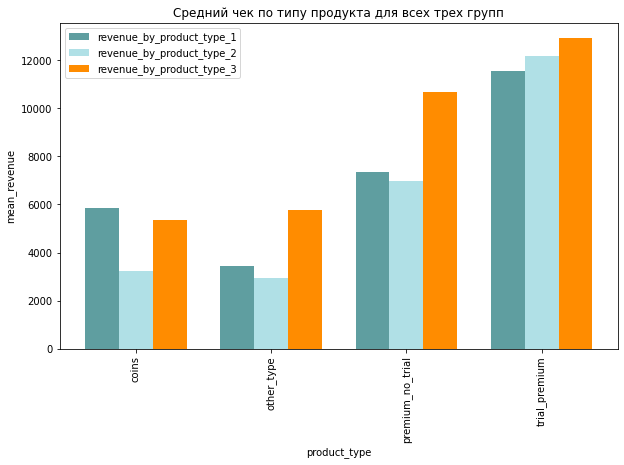

In [94]:
product_types = revenue_by_product_type_1['product_type']
revenue1 = revenue_by_product_type_1['revenue']
revenue2 = revenue_by_product_type_2['revenue']
revenue3 = revenue_by_product_type_3['revenue']

x = np.arange(len(product_types))
width = 0.25

plt.figure(figsize=(10, 6))
plt.bar(x - width, revenue1, width, label='revenue_by_product_type_1', color='cadetblue')
plt.bar(x, revenue2, width, label='revenue_by_product_type_2', color='powderblue')
plt.bar(x + width, revenue3, width, label='revenue_by_product_type_3', color='darkorange')

plt.xlabel('product_type')
plt.ylabel('mean_revenue')
plt.title("Средний чек по типу продукта для всех трех групп")
plt.xticks(x, product_types, rotation=90)
plt.legend()

plt.show()

По результатам визуации мы получили такой график. Видим, что средний чек по тестовой группе превышает все показатели для 2-й КГ и во всех категориях кроме coins также превышает показатели 1-й КГ. Из этого мы можем сделать вывод, что увеличение стоимости премиум-подписки (premium_no_trial) повлекло увеличение среднего чека по данному типу продукта (что весьма логично), а также увеличение чеков по остальным типам продуктов.

Вероятнее всего, в ситуации подорожания какого-либо продукта часть пользователей, которая его до этого покупала, обычно переходит на другой продукт, потому что не хочет платить больше. Посморим на изменение конверсии в премиального клиента, чтобы подтвердить наше предположение.

### Статистический анализ данных

### Часть 1. Конверсия.

Поскольку пользователи могли стать премиальными клиентами еще до начала A/B-теста, то нас будут интересовать только те юзеры, которые купили премиум-подписку уже во время A/B-теста (то есть они совершили транзакцию по типу продукта premium_no_trial).

In [95]:
# Для начала отфильтруем нужных нам юзеров из таблицы их транзакций
filter_transactions_control_1 = transactions_control_1.query('product_type == "premium_no_trial"').drop_duplicates(subset=['uid'])
filter_transactions_control_1

,uid,country,joined_at,paid_at,revenue,payment_id,from_page,product_type,diff,joined_at_day
11,891716358.0,India,2017-10-29 06:55:00,2017-10-29 23:17:00,4914.0,147.0,dating,premium_no_trial,0 days 16:22:00,2017-10-29
15,891131061.0,Chile,2017-09-11 07:04:00,2017-09-11 23:38:00,6292.0,147.0,left_sidebar_menu,premium_no_trial,0 days 16:34:00,2017-09-11
25,891142386.0,Switzerland,2017-08-11 23:02:00,2017-08-11 23:38:00,4680.0,147.0,left_sidebar_menu,premium_no_trial,0 days 00:36:00,2017-08-11
30,892421277.0,United States of America,2017-10-14 13:05:00,2017-10-15 13:11:00,47723.0,147.0,promo_09,premium_no_trial,1 days 00:06:00,2017-10-14
36,891092322.0,Argentina,2017-09-11 22:48:00,2017-10-11 01:18:00,5278.0,147.0,autoreply_message,premium_no_trial,29 days 02:30:00,2017-09-11
...,...,...,...,...,...,...,...,...,...,...
365,891486135.0,Italy,2017-02-11 20:22:00,2017-03-11 13:09:00,6448.0,147.0,promo_09,premium_no_trial,27 days 16:47:00,2017-02-11
366,892042395.0,United States of America,2017-10-22 09:21:00,2017-10-23 03:35:00,4537.0,147.0,promo_09,premium_no_trial,0 days 18:14:00,2017-10-22
371,892074894.0,Canada,2017-10-21 17:12:00,2017-10-25 17:20:00,6292.0,147.0,promo_09,premium_no_trial,4 days 00:08:00,2017-10-21
372,891556971.0,France,2017-01-11 05:07:00,2017-01-11 05:16:00,2886.0,68.0,none,premium_no_trial,0 days 00:09:00,2017-01-11


In [96]:
# Объединяем для 1-й КГ таблицы по пользователям и их транзакциям
CONTROL_1 = users_control_1.merge(filter_transactions_control_1, on='uid', how='left')
CONTROL_1['premium'] = CONTROL_1.payment_id.apply(lambda x: 'premium' if not pd.isna(x) else 'not_premium')
CONTROL_1['group'] = 'g_control_1'
CONTROL_1

,uid,age,attraction_coeff,coins,country_x,visit_days,gender,age_filter_start,age_filter_end,views_count,...,joined_at,paid_at,revenue,payment_id,from_page,product_type,diff,joined_at_day,premium,group
0,892319115,25,435,NaN,United States of America,"1,2,3,4,5,6",0,22,32,982,...,NaT,NaT,NaN,NaN,NaN,NaN,NaT,NaT,not_premium,g_control_1
1,891248523,29,500,NaN,United States of America,"1,2",1,26,32,12,...,NaT,NaT,NaN,NaN,NaN,NaN,NaT,NaT,not_premium,g_control_1
2,891670932,33,800,NaN,France,"1,2,3,5,6,8,9,11,13,16",1,30,36,5,...,NaT,NaT,NaN,NaN,NaN,NaN,NaT,NaT,not_premium,g_control_1
3,891060786,26,0,NaN,Argentina,"1,2,3,4,5",1,23,29,0,...,NaT,NaT,NaN,NaN,NaN,NaN,NaT,NaT,not_premium,g_control_1
4,892006554,35,294,NaN,United States of America,"1,2,3,5,6,7,8,9,10,12,15,16,17,19",1,30,40,17,...,NaT,NaT,NaN,NaN,NaN,NaN,NaT,NaT,not_premium,g_control_1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4335,892022304,26,227,NaN,United States of America,NaN,0,23,29,427,...,NaT,NaT,NaN,NaN,NaN,NaN,NaT,NaT,not_premium,g_control_1
4336,891905022,38,200,NaN,Argentina,"1,2,3,4,5,6,7,8,9,10,11,13,14,15,16,21",1,20,50,5,...,NaT,NaT,NaN,NaN,NaN,NaN,NaT,NaT,not_premium,g_control_1
4337,891304722,49,411,NaN,United States of America,1,1,46,52,17,...,NaT,NaT,NaN,NaN,NaN,NaN,NaT,NaT,not_premium,g_control_1
4338,891302328,27,0,NaN,United States of America,"1,3,5",1,24,30,0,...,NaT,NaT,NaN,NaN,NaN,NaN,NaT,NaT,not_premium,g_control_1


Повторим те же манипуляции для 2-й КГ и для тестовой группы.

In [97]:
filter_transactions_control_2 = transactions_control_2.query('product_type == "premium_no_trial"').drop_duplicates(subset=['uid'])

In [98]:
CONTROL_2 = users_control_2.merge(filter_transactions_control_2, on='uid', how='left')
CONTROL_2['premium'] = CONTROL_2.payment_id.apply(lambda x: 'premium' if not pd.isna(x) else 'not_premium')
CONTROL_2['group'] = 'g_control_2'

In [99]:
filter_transactions_test = transactions_test.query('product_type == "premium_no_trial"').drop_duplicates(subset=['uid'])

In [100]:
TEST = users_test.merge(filter_transactions_test, on='uid', how='left')
TEST['premium'] = TEST.payment_id.apply(lambda x: 'premium' if not pd.isna(x) else 'not_premium')
TEST['group'] = 'g_test'

Для начала посчитаем по стандартной формуле конверсию в премиального клиента для всех групп (делим число премиальных юзеров на всех юзеров в группе):

In [101]:
conv_1 = 99/4340*100
print(f"Конверсия для 1-й КГ равна {conv_1} %")

Конверсия для 1-й КГ равна 2.28110599078341 %


In [102]:
conv_2 = 102/4264*100
print(f"Конверсия для 2-й КГ равна {conv_2} %")

Конверсия для 2-й КГ равна 2.3921200750469045 %


In [103]:
conv_3 = 67/4308*100
print(f"Конверсия для тестовой группы равна {conv_3} %")

Конверсия для тестовой группы равна 1.5552460538532962 %


Видим, что конверсия в премиального клиента в тестовой группе ниже, чем в обеих контрольных. Однако, проверим наше предположение с помощью статистики. Попарно сравним каждую контрольную группу с тестовой используя критерий Хи-квадрат (поскольку мы работаем с конверсией). Для этого соединим данные по каждой контрольной и тестовой группе, чтобы в дальнейшем сделать таблицы сопряжённости для теста Хи-квадрат и проверить, есть ли разница между конверсиями в премиального клиента для всех групп.

- $H_0$: различия между конверсиями отсутствуют
- $H_1$: статистически значимые различия есть

In [104]:
CONV_1 = pd.concat([CONTROL_1, TEST])

In [105]:
pd.crosstab(CONV_1.premium, CONV_1.group)

group,g_control_1,g_test
premium,,
not_premium,4241,4241
premium,99,67


In [106]:
CONV_2 = pd.concat([CONTROL_2, TEST])

In [107]:
pd.crosstab(CONV_2.premium, CONV_2.group)

group,g_control_2,g_test
premium,,
not_premium,4162,4241
premium,102,67


In [108]:
# Выполнение теста хи-квадрат для первого датафрейма
chi2_g1, p_g1, dof_g1, expected_g1 = chi2_contingency(pd.crosstab(CONV_1.premium, CONV_1.group))

In [109]:
# Выполнение теста хи-квадрат для второго датафрейма
chi2_g2, p_g2, dof_g2, expected_g2 = chi2_contingency(pd.crosstab(CONV_2.premium, CONV_2.group))

Так как тест Хи-квадрат выполняется для каждой пары групп, то нам необходимо применить поправку Бонферрони на множественные сравнения.

In [110]:
# Применение поправки Бонферрони
p_values = [p_g1, p_g2]
bonferroni_correction = [p * len(p_values) for p in p_values]

In [112]:
# Вывод результатов
print("Тест хи-квадрат для первого датафрейма:")
print(f"Chi-squared statistic: {chi2_g1}, P-value: {p_g1}, P-value с поправкой Бонферрони: {bonferroni_correction[0]}")

print("\nТест хи-квадрат для второго датафрейма:")
print(f"Chi-squared statistic: {chi2_g2}, P-value: {p_g2}, P-value с поправкой Бонферрони: {bonferroni_correction[1]}")

Тест хи-квадрат для первого датафрейма:
Chi-squared statistic: 5.670943289422667, P-value: 0.017248178856356836, P-value с поправкой Бонферрони: 0.03449635771271367

Тест хи-квадрат для второго датафрейма:
Chi-squared statistic: 7.338605564293735, P-value: 0.006748917188525369, P-value с поправкой Бонферрони: 0.013497834377050738


Видим, что p-value с поправкой Бонферрони в обоих случаях меньше 0.05, следовательно, мы отклоняем нулевую гипотезу и можем сказать, что статистически значимые различия между конверсиями в контрольных и тестовой группах есть.

Итак, конверсия в премиального клиента в тестовой группе статистически значимо ниже, чем в обеих контрольных. Именно поэтому для проверки успешности эксперимента мы сформулируем две основные гипотезы - по премиальному типу продукта и по всему приложению в целом.

### Часть 2. ARPPU.

Итак, у нас был проведен А/Б-тест, в ходе которого увеличили стоимость премиум-подписки (premium_no_trial) для новых пользователей дейтингового приложения.

1-я гипотеза: Если повысим стоимость премиум-подписки, то средняя выручка на пользователя в типе продукта premium_no_trial увеличится.

2-я гипотеза: Если повысим стоимость премиум-подписки, то средняя выручка на пользователя для всего дейтингового приложения увеличится, т.к. часть пользователей будет оттекать в другие типы продукта.

Нам необходимо выбрать метрики, с помощью которых мы сможем судить об успехе эксперимента. 

Целевые метрики: ARPPU для категории premium_no_trial, ARPPU для всего приложения

Целевую метрику считаем по формуле: ARPPU = Revenue / Paying users

Для начала проведем небольшой разведочный анализ данных и посчитаем ARPPU для всего приложения:

In [113]:
# Вернемся к таблице со средним чеком, которую мы составляли выше
revenue_by_product_type_3

,product_type,revenue
0,coins,5341.283019
1,other_type,5786.793103
2,premium_no_trial,10667.184211
3,trial_premium,12906.483871


Из таблицы со средним чеком для тестовой группы берем: revenue/cheque (test) = 10667.1842

In [114]:
# Теперь посчитаем среднее кол-во чеков на пользователя
cheque_test = transactions_test.query('product_type == "premium_no_trial"').revenue.count()
user_test = transactions_test.query('product_type == "premium_no_trial"').uid.nunique()
avg_cheque_per_user_test = cheque_test / user_test
print(f"Среднее кол-во чеков на пользователя для тестовой группы равно {avg_cheque_per_user_test.round(4)}")

Среднее кол-во чеков на пользователя для тестовой группы равно 1.1343


То есть имеем следующее: cheque/user (test) = 1.1343

По формуле получаем: revenue/cheque * cheque/user = revenue/user

In [115]:
# Считаем нашу метрику ARPPU для тестовой группы
arppu_test = 10667.1842 * 1.1343
print(f"ИТОГО: ARPPU для тестовой группы равно {arppu_test}")

ИТОГО: ARPPU для тестовой группы равно 12099.78703806


Теперь посчитаем эту же метрику для обеих контрольных групп.

Из таблицы со средним чеком для 1-й КГ берем: revenue/cheque (contr_1) = 7351.5000

In [116]:
cheque_contr_1 = transactions_control_1.query('product_type == "premium_no_trial"').revenue.count()
users_contr_1 = transactions_control_1.query('product_type == "premium_no_trial"').uid.nunique()
avg_cheque_per_user_contr_1 = cheque_contr_1 / users_contr_1
print(f"Среднее кол-во чеков на пользователя для 1-й КГ равно {avg_cheque_per_user_contr_1.round(4)}")

Среднее кол-во чеков на пользователя для 1-й КГ равно 1.0707


In [117]:
arppu_contr_1 = 7351.5000 * 1.0707
print(f"ИТОГО: ARPPU для 1-й КГ равно {arppu_contr_1}")

ИТОГО: ARPPU для 1-й КГ равно 7871.25105


Из таблицы со средним чеком для 2-й КГ берем:revenue/cheque (contr_2) = 6960.8318

In [118]:
cheque_contr_2 = transactions_control_2.query('product_type == "premium_no_trial"').revenue.count()
users_contr_2 = transactions_control_2.query('product_type == "premium_no_trial"').uid.nunique()
avg_cheque_per_user_contr_2 = cheque_contr_2 / users_contr_2
print(f"Среднее кол-во чеков на пользователя для 2-й КГ равно {avg_cheque_per_user_contr_2.round(4)}")

Среднее кол-во чеков на пользователя для 2-й КГ равно 1.049


In [119]:
arppu_contr_2 = 6960.8318 * 1.0490
print(f"ИТОГО: ARPPU для 2-й КГ равно {arppu_contr_2}")

ИТОГО: ARPPU для 2-й КГ равно 7301.9125582


Видим, что ARPPU для тестовой группы заметно выше, чем для обеих контрольных (причем среднее кол-во чеков на пользователя практически не менялось). Однако, проверим наши предположения с помощью статистики.

Используем статистические методы, чтобы проверить, есть ли значимые различия между группами. Сравним поочередно метрики в обеих контрольных группах с тестовой группой (еще одна контрольная группа, аналогичная первой, помогает убедиться в стабильности результатов). Начнем с проверки 1-й гипотезы для категории premium_no_trial.


In [120]:
ARPPU_test = (
    transactions_test
    .query('product_type == "premium_no_trial"')
    .groupby('uid')
    .agg({'revenue': 'sum'})
)
ARPPU_test

,revenue
uid,
891071157,9100
891152790,12597
891178380,113477
891222282,6292
891291531,4056
...,...
892370097,11115
892390170,5369
892405179,9100


In [121]:
ARPPU_contr_1 = (
    transactions_control_1
    .query('product_type == "premium_no_trial"')
    .groupby('uid')
    .agg({'revenue': 'sum'})
)
ARPPU_contr_1

,revenue
uid,
891092322.0,5278.0
891120969.0,6292.0
891130164.0,4537.0
891131061.0,6292.0
891142386.0,4680.0
...,...
892366260.0,12584.0
892380033.0,4732.0
892393119.0,3614.0


In [122]:
ARPPU_contr_2 = (
    transactions_control_2
    .query('product_type == "premium_no_trial"')
    .groupby('uid')
    .agg({'revenue': 'sum'})
)
ARPPU_contr_2

,revenue
uid,
891068079,6292
891077727,6292
891112263,4680
891136632,10413
891143379,6500
...,...
892343331,2873
892354854,6435
892364742,4797


Визуализируем полученные данные и проверим их на нормальность распределения

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


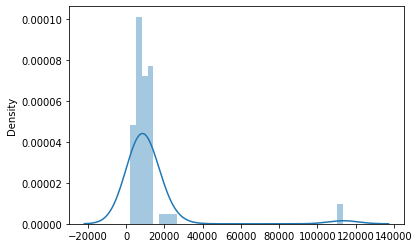

In [123]:
sns_plot = sns.distplot(ARPPU_test)
fig = sns_plot.get_figure()

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


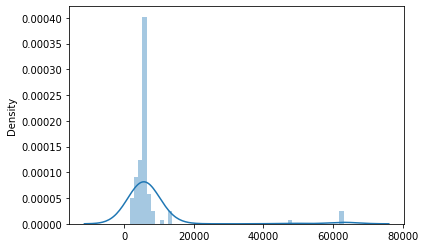

In [124]:
sns_plot = sns.distplot(ARPPU_contr_1)
fig = sns_plot.get_figure()

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


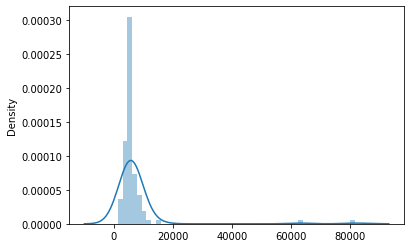

In [125]:
sns_plot = sns.distplot(ARPPU_contr_2)
fig = sns_plot.get_figure()

In [126]:
ss.normaltest(ARPPU_test)

NormaltestResult(statistic=array([106.54140303]), pvalue=array([7.32534841e-24]))

In [127]:
ss.normaltest(ARPPU_contr_1)

NormaltestResult(statistic=array([124.21739943]), pvalue=array([1.06300287e-27]))

In [128]:
ss.normaltest(ARPPU_contr_2)

NormaltestResult(statistic=array([171.99524134]), pvalue=array([4.48443658e-38]))

Видим, что наши данные распределены ненормально (денежные метрики в принципе практически никогда не бывают нормальными, но мы это еще подтвердили статистически). К тому же, объем данных не превышает 200 человек по каждой группе, и в тестовой группе меньше исследуемых пользователей, следовательно, t-тест мы использовать не можем. 

Его непараметрический аналог - тест Манна-Уитни - так же мало подходит для нашей задачи, поскольку его интерпретация весьма тяжело доносима до бизнеса, а мы работаем с денежной метрикой, где важна точность.

Итак, воспользуемся для наших данных методикой бутстрапа.

In [129]:
bootstrap_results = bootstrap((ARPPU_test,), np.mean, confidence_level=0.95, n_resamples=10000)
print("Доверительный интервал для тестовой группы:", bootstrap_results.confidence_interval)

Доверительный интервал для тестовой группы: ConfidenceInterval(low=array([9030.88583978]), high=array([20003.90319941]))


In [130]:
bootstrap_results = bootstrap((ARPPU_contr_1,), np.mean, confidence_level=0.95, n_resamples=10000)
print("Доверительный интервал для 1-й КГ:", bootstrap_results.confidence_interval)

Доверительный интервал для 1-й КГ: ConfidenceInterval(low=array([6255.15648922]), high=array([10846.51456655]))


In [131]:
bootstrap_results = bootstrap((ARPPU_contr_2,), np.mean, confidence_level=0.95, n_resamples=10000)
print("Доверительный интервал для 2-й КГ:", bootstrap_results.confidence_interval)

Доверительный интервал для 2-й КГ: ConfidenceInterval(low=array([6029.42664961]), high=array([10550.48612896]))


Проанализируем ширину доверительного интервала во всех трех группах. Широкий доверительный интервал (особенно в тестовой группе) указывает на высокую неопределенность в оценке, что может быть связано с малым размером исходной выборки или высокой вариабельностью данных.

Построим доверительные интервалы для разницы в средних:

In [132]:
mean_diff_1 = []

for i in range(10000):
    sample_data_control_1 = ARPPU_contr_1.sample(frac=1, replace=True)
    sample_mean_control_1 = sample_data_control_1.revenue.mean()
    
    sample_data_test = ARPPU_test.sample(frac=1, replace=True)
    sample_mean_test = sample_data_test.revenue.mean()
    
    sample_mean_diff_1 = sample_mean_control_1 - sample_mean_test
    mean_diff_1.append(sample_mean_diff_1)

In [133]:
pd.Series(mean_diff_1).quantile(0.975)

122.52632293079783

In [134]:
pd.Series(mean_diff_1).quantile(0.025)

-9387.54655510327

In [135]:
mean_diff_2 = []

for i in range(10000):
    sample_data_control_2 = ARPPU_contr_2.sample(frac=1, replace=True)
    sample_mean_control_2 = sample_data_control_2.revenue.mean()
    
    sample_data_test = ARPPU_test.sample(frac=1, replace=True)
    sample_mean_test = sample_data_test.revenue.mean()
    
    sample_mean_diff_2 = sample_mean_control_2 - sample_mean_test
    mean_diff_2.append(sample_mean_diff_2)

In [136]:
pd.Series(mean_diff_2).quantile(0.975)

-604.2368232367561

In [137]:
pd.Series(mean_diff_2).quantile(0.025)

-10126.541461808603

Видим, что в первом случае интервал пересекает 0. Однако, попробуем  провести анализ с другим, более меньшим, доверительным интервалом.

In [138]:
pd.Series(mean_diff_1).quantile(0.95)

-463.79748982360996

In [139]:
pd.Series(mean_diff_1).quantile(0.05)

-8505.761925222372

Такой результат означает, что в обоих случаях с очень высокой вероятностью (95% и 97.5% соответственно) различия между средними в нашем эксперименте находятся в указанных диапазонах. Данные диапазоны не пересекают 0, то есть разница между средними отрицательная и статистически значимая. Таким образом, можно сказать, что ARPPU для тестовой группы статистически значимо выше, чем для обеих контрольных групп в категории premium_no_trial.

Проведем аналогичные расчеты для проверки 2-й гипотезы.

In [140]:
ARPPU_test_all = (
    transactions_test
    .groupby('uid')
    .agg({'revenue': 'sum'})
)
ARPPU_test_all

,revenue
uid,
891071157,9100
891152790,12597
891174411,28080
891175326,897
891178380,129870
...,...
892426491,12597
892430988,12727
892431081,9087


In [141]:
ARPPU_contr_1_all = (
    transactions_control_1
    .groupby('uid')
    .agg({'revenue': 'sum'})
)
ARPPU_contr_1_all

,revenue
uid,
891092322.0,9945.0
891120969.0,6292.0
891130164.0,11869.0
891131061.0,10075.0
891135642.0,962.0
...,...
892405224.0,8424.0
892421277.0,60333.0
892421826.0,14586.0


In [142]:
ARPPU_contr_2_all = (
    transactions_control_2
    .groupby('uid')
    .agg({'revenue': 'sum'})
)
ARPPU_contr_2_all

,revenue
uid,
891068079,10296
891075072,2327
891077727,6292
891080040,15132
891112263,17290
...,...
892384110,9087
892385232,6292
892395564,2730


/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


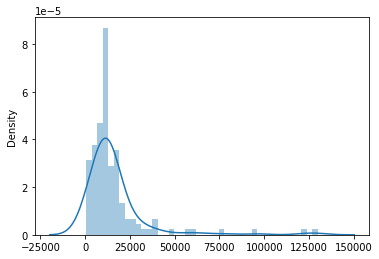

In [143]:
sns_plot = sns.distplot(ARPPU_test_all)
fig = sns_plot.get_figure()

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


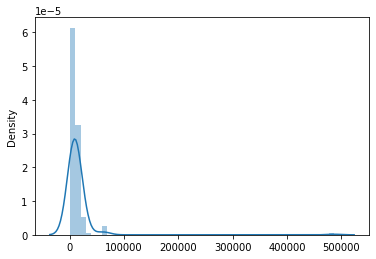

In [144]:
sns_plot = sns.distplot(ARPPU_contr_1_all)
fig = sns_plot.get_figure()

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


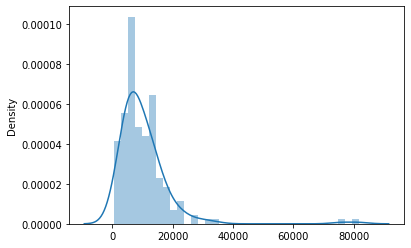

In [145]:
sns_plot = sns.distplot(ARPPU_contr_2_all)
fig = sns_plot.get_figure()

In [146]:
bootstrap_results = bootstrap((ARPPU_test_all,), np.mean, confidence_level=0.95, n_resamples=10000)
print("Доверительный интервал для тестовой группы:", bootstrap_results.confidence_interval)

Доверительный интервал для тестовой группы: ConfidenceInterval(low=array([13705.78899464]), high=array([20006.12798967]))


In [147]:
bootstrap_results = bootstrap((ARPPU_contr_1_all,), np.mean, confidence_level=0.95, n_resamples=10000)
print("Доверительный интервал для 1-й КГ:", bootstrap_results.confidence_interval)

Доверительный интервал для 1-й КГ: ConfidenceInterval(low=array([10603.40955328]), high=array([24780.05067051]))


In [148]:
bootstrap_results = bootstrap((ARPPU_contr_2_all,), np.mean, confidence_level=0.95, n_resamples=10000)
print("Доверительный интервал для 2-й КГ:", bootstrap_results.confidence_interval)

Доверительный интервал для 2-й КГ: ConfidenceInterval(low=array([9205.04242999]), high=array([11998.99177911]))


Так же построим доверительные интервалы для разницы в средних:

In [149]:
mean_diff_3 = []

for i in range(10000):
    sample_data_control_1_all = ARPPU_contr_1_all.sample(frac=1, replace=True)
    sample_mean_control_1_all = sample_data_control_1_all.revenue.mean()
    
    sample_data_test_all = ARPPU_test_all.sample(frac=1, replace=True)
    sample_mean_test_all = sample_data_test_all.revenue.mean()
    
    sample_mean_diff_3 = sample_mean_control_1_all - sample_mean_test_all
    mean_diff_3.append(sample_mean_diff_3)

In [150]:
pd.Series(mean_diff_3).quantile(0.975)

3958.8037777698873

In [151]:
pd.Series(mean_diff_3).quantile(0.025)

-7469.34088473277

In [152]:
mean_diff_4 = []

for i in range(10000):
    sample_data_control_2_all = ARPPU_contr_2_all.sample(frac=1, replace=True)
    sample_mean_control_2_all = sample_data_control_2_all.revenue.mean()
    
    sample_data_test_all = ARPPU_test_all.sample(frac=1, replace=True)
    sample_mean_test_all = sample_data_test_all.revenue.mean()
    
    sample_mean_diff_4 = sample_mean_control_2_all - sample_mean_test_all
    mean_diff_4.append(sample_mean_diff_4)

In [153]:
pd.Series(mean_diff_4).quantile(0.975)

-2721.3154814665604

In [154]:
pd.Series(mean_diff_4).quantile(0.025)

-9166.573765658195

Как мы видим, статистически значимая отрицательная разница наблюдается только во втором случае (сравнение 2-й КГ и тестовой группы). По результатам разведочного анализа помним, что ARPPU для 1-й КГ был выше, чем для 2-й КГ - здесь получаем аналогичный результат (различие между тестовой и 1-й КГ меньше). Итак, ARPPU для тестовой группы статистически значимо выше только по сравнению со 2-й КГ для всего приложения.

### Выводы

По итогу проделанной работы мы можем говорить о подтверждении нашей первой гипотезы, т.е. если мы повышаем стоимость премиум-подписки, то средняя выручка на пользователя в типе продукта premium_no_trial увеличивается. Вторая гипотеза подтверждается только при сравнении тестовой группы и 2-й контрольной группы по всему приложению - однозначно говорить об успехе нововведения для всего дейтингового приложения мы не можем, так как нет стабильности результатов. Это может быть связано с малым размером выборок, широким доверительным интервалом, который может говорить о большой вариативности данных, не совсем корректной системой сплитования, из-за которой в 1-й КГ платежеспособность клиентов могла оказаться выше, эффектом случайности. Так же подобный результат может быть вызван тем, что пользователи, отказавшиеся от премиальной подписки не стали оттекать в другие типы продукта, как мы предполагали, а продолжили пользоваться бесплатной версией приложения или вовсе перешли на другой продукт. Так или иначе, в целом мы можем говорить об успешности нашего эксперимента. Однако, учитывая довольно необычные данные о времени регистрации и оплаты пользователей, а также малое количество наблюдений, стоит в дальнейшем перед началом проведения A/B-теста проводить A/А-тест и анализ статистической мощности.